<a href="https://colab.research.google.com/github/sriharshini13/IIITH_INTERNSHIP/blob/main/TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  YOLOv8 Custom Object Detection – Full Project Guide

**Objective:** Detect a custom object (e.g., bike) by creating your own dataset from a YouTube video, annotating it, training YOLOv8, and testing the results.

---

##  STEP 1: Project Folder Setup

### Create a Project Folder
Create a new folder called:
`yolov8_bike_detection`

### Open it in VS Code
Right-click the newly created folder and select "Open with Code".

---

##  STEP 2: Python Virtual Environment Setup

### Open Terminal in VS Code
Go to `Terminal` > `New Terminal` in VS Code.

### Create and Activate a Virtual Environment
```bash
python -m venv yolovenv
yolovenv\Scripts\activate   # For Windows
(You should see (yolovenv) at the beginning of your terminal prompt, indicating the environment is active.)

Install Required Packages
Ensure your yolovenv environment is active, then run:

Bash

pip install ultralytics roboflow opencv-python yt-dlp


 **STEP 3: Download and Extract Frames from YouTube Video**

Create a folder to store your video

    mkdir video
    cd video

Download the video
Bash

    yt-dlp -f best -o "myvideo.%(ext)s" [https://www.youtube.com/watch?v=VIDEO_ID](https://www.youtube.com/watch?v=VIDEO_ID)
(This will download the best quality video and name it myvideo.mp4 or myvideo.webm based on the format.)

(Optional) Rename the file if needed
If the downloaded file is myvideo.webm and you prefer myvideo.mp4:

Bash

    ren myvideo.webm myvideo.mp4
Go back to the main project folder and extract frames
Bash

    cd ..  # Go back to yolov8_bike_detection
    mkdir frames
    ffmpeg -i video/myvideo.mp4 -vf fps=1 frames/frame_%04d.jpg
(This will extract one frame per second from your video and save them as JPG images in the frames folder.)

 **STEP 4: Annotate Images Using Roboflow**

1. Go to Roboflow
Navigate to: https://app.roboflow.com\
Sign up for a free account or log in.

2. Create a New Project
Click Create New Project.

3. Set Project Type: Object Detection (Bounding Box).

Give it a Name: e.g., bike_detection.

4. Define Class Names: e.g., bike (add more if you have other objects).

5. Upload Images
Click Upload.

6. Select "Local" or "Folder" and upload all images from the frames/ folder you created in Step 3.

7. Annotate Images
Go to the Annotate section.

8. Manually draw tight bounding boxes around all instances of your objects (e.g., bikes) in each image.

9. Ensure all images are thoroughly annotated.

10. Generate Dataset
Once annotation is complete, click the "Generate" button (usually at the bottom-left of the annotation interface).

11. Choose Generate New Version.

Under Preprocessing, select Resize to 640x640 (Stretch).

(Optional, but recommended for small datasets) Under Augmentation, apply transformations like Flip (Horizontal), Rotate (up to 15 degrees), Brightness (random 0-15%) to increase dataset variety.

12. Click Generate.

13. Download the ZIP file
After the dataset is generated, click Export.

14. Choose export format: YOLOv8 PyTorch.

15. Select Download zip to computer.
---

**STEP 5: Organize the Dataset Locally**

Unzip the Roboflow ZIP file into your project folder
Move the downloaded .zip file into your yolov8_bike_detection folder.

Right-click the .zip file and select "Extract All..." to unzip it.

This will create a new folder (e.g., bike_detection-1) inside your yolov8_bike_detection project. You can rename this folder to dataset for simplicity.

Verify and Adjust data.yaml
Navigate into the dataset/ folder (or whatever you named the extracted folder).

Open the data.yaml file located there.

Ensure the paths are relative to the dataset folder as follows:

YAML

    # Path to the dataset root folder (e.g., 'dataset')
    path: .

    # Train and validation image/label paths, relative to 'path'
    train: train/images
    val: valid/images
    test: test/images # Keep this line if Roboflow created a test set, otherwise delete it

    # Number of classes
    nc: 1 # Or the total number of classes you defined

    # Class names
    names: ['bike'] # Or your list of class names, e.g., ['apple', 'banana', 'orange']
Save the data.yaml file.
---
**STEP 6: Train YOLOv8 on Custom Dataset
Run YOLOv8 Training**

Ensure your yolovenv virtual environment is active in the VS Code terminal.

Bash

    yolo task=detect mode=train model=yolov8n.pt data=dataset/data.yaml epochs=30 imgsz=640
    model: You can use yolov8n.pt (nano, smallest, fastest), yolov8s.pt (small), yolov8m.pt (medium), etc., depending on your desired accuracy and available training time. yolov8n.pt is good for CPU.

epochs: Number of training iterations (e.g., 30). You might need more for better accuracy.

imgsz: Input image size (e.g., 640x640).

Output Directory
The training output (trained model, plots, metrics) is saved to:
yolov8_bike_detection/runs/detect/train/

Inside, you'll find:

weights/best.pt → Your best trained model weights.

Training plots and metrics (results.png, etc.).

---
**STEP 7: Run Inference on New Images**
Place test image in project folder
Create a new folder test_images in yolov8_bike_detection. Place an image or video (e.g., my_bike_test.jpg or my_bike_test.mp4) that your model has not seen during training here.

Run Inference Using Trained Model
Ensure your yolovenv virtual environment is active.

Bash

    yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=test_images/my_bike_test.jpg save=True
IMPORTANT: Replace test_images/my_bike_test.jpg with the actual path and filename of your test image or video.

save=True will save the output image/video with bounding boxes.

Check Output
Annotated images/videos with detections will be saved in:
yolov8_bike_detection/runs/detect/predict/
(Subsequent runs will create predict2, predict3, etc.)

📁 Final Project Folder Structure (Example)

    yolov8_bike_detection/
    ├── yolovenv/                  # Python virtual environment
    ├── video/
    │   └── myvideo.mp4            # Your downloaded YouTube video
    ├── frames/
    │   └── frame_0001.jpg         # Extracted video frames
    │   └── frame_0002.jpg
    │   └── ...
    ├── dataset/                   # Your annotated dataset from Roboflow
    │   ├── train/
    │   │   ├── images/
    │   │   └── labels/
    │   ├── valid/
    │   │   ├── images/
    │   │   └── labels/
    │   ├── test/
    │   │   ├── images/
    │   │   └── labels/
    │   └── data.yaml              # Dataset configuration file
    ├── test_images/               # Folder for new images/videos to test
    │   └── my_bike_test.jpg  
    ├── runs/                      # Directory for training and inference outputs
    │   └── detect/
    │       ├── train/             # Training results
    │       │   └── weights/
    │       │       └── best.pt    # Your trained model weights
    │       │   └── results.png
    │       │   └── ...
    │       └── predict/           # Inference results
    │           └── my_bike_test.jpg # Annotated test image
    │           └── ...
    └── .gitignore                 # (Optional) For Git users
    └── README.md                  # (Optional) Project description

---
outputs:

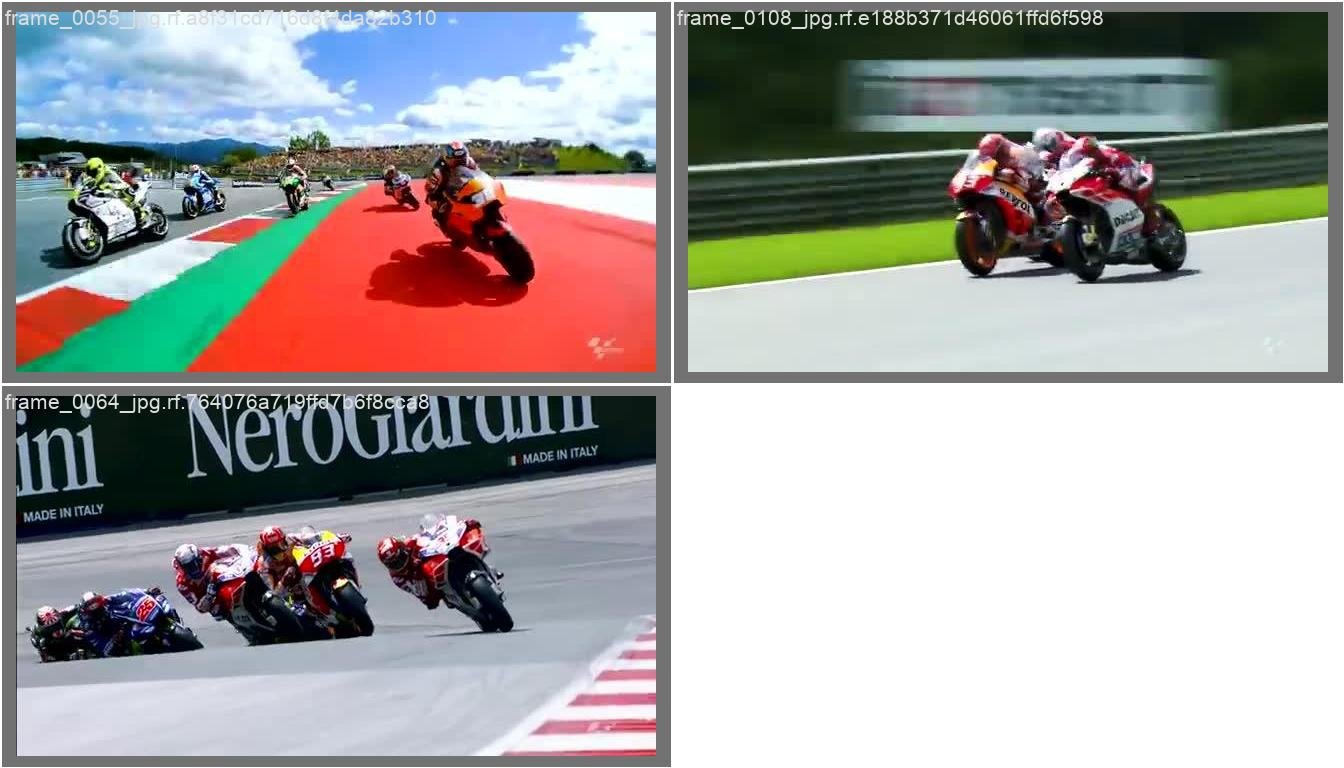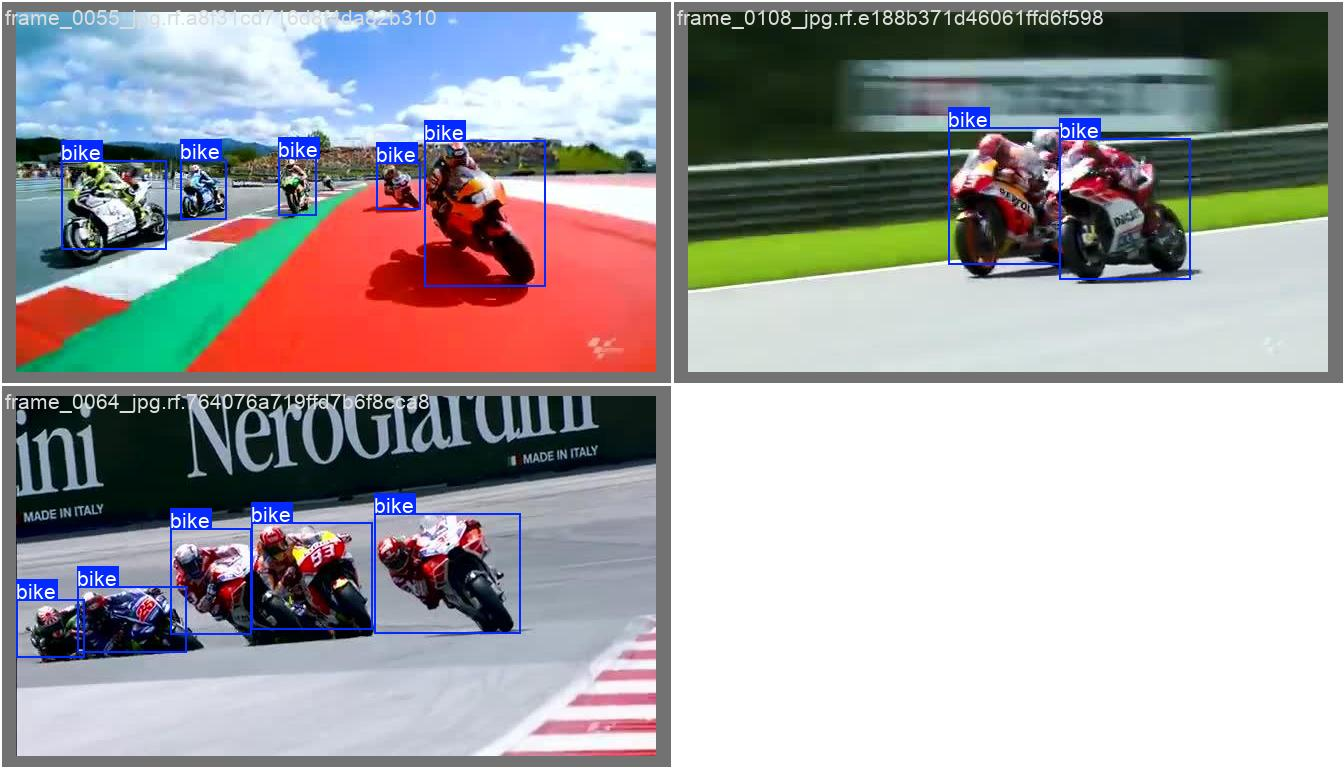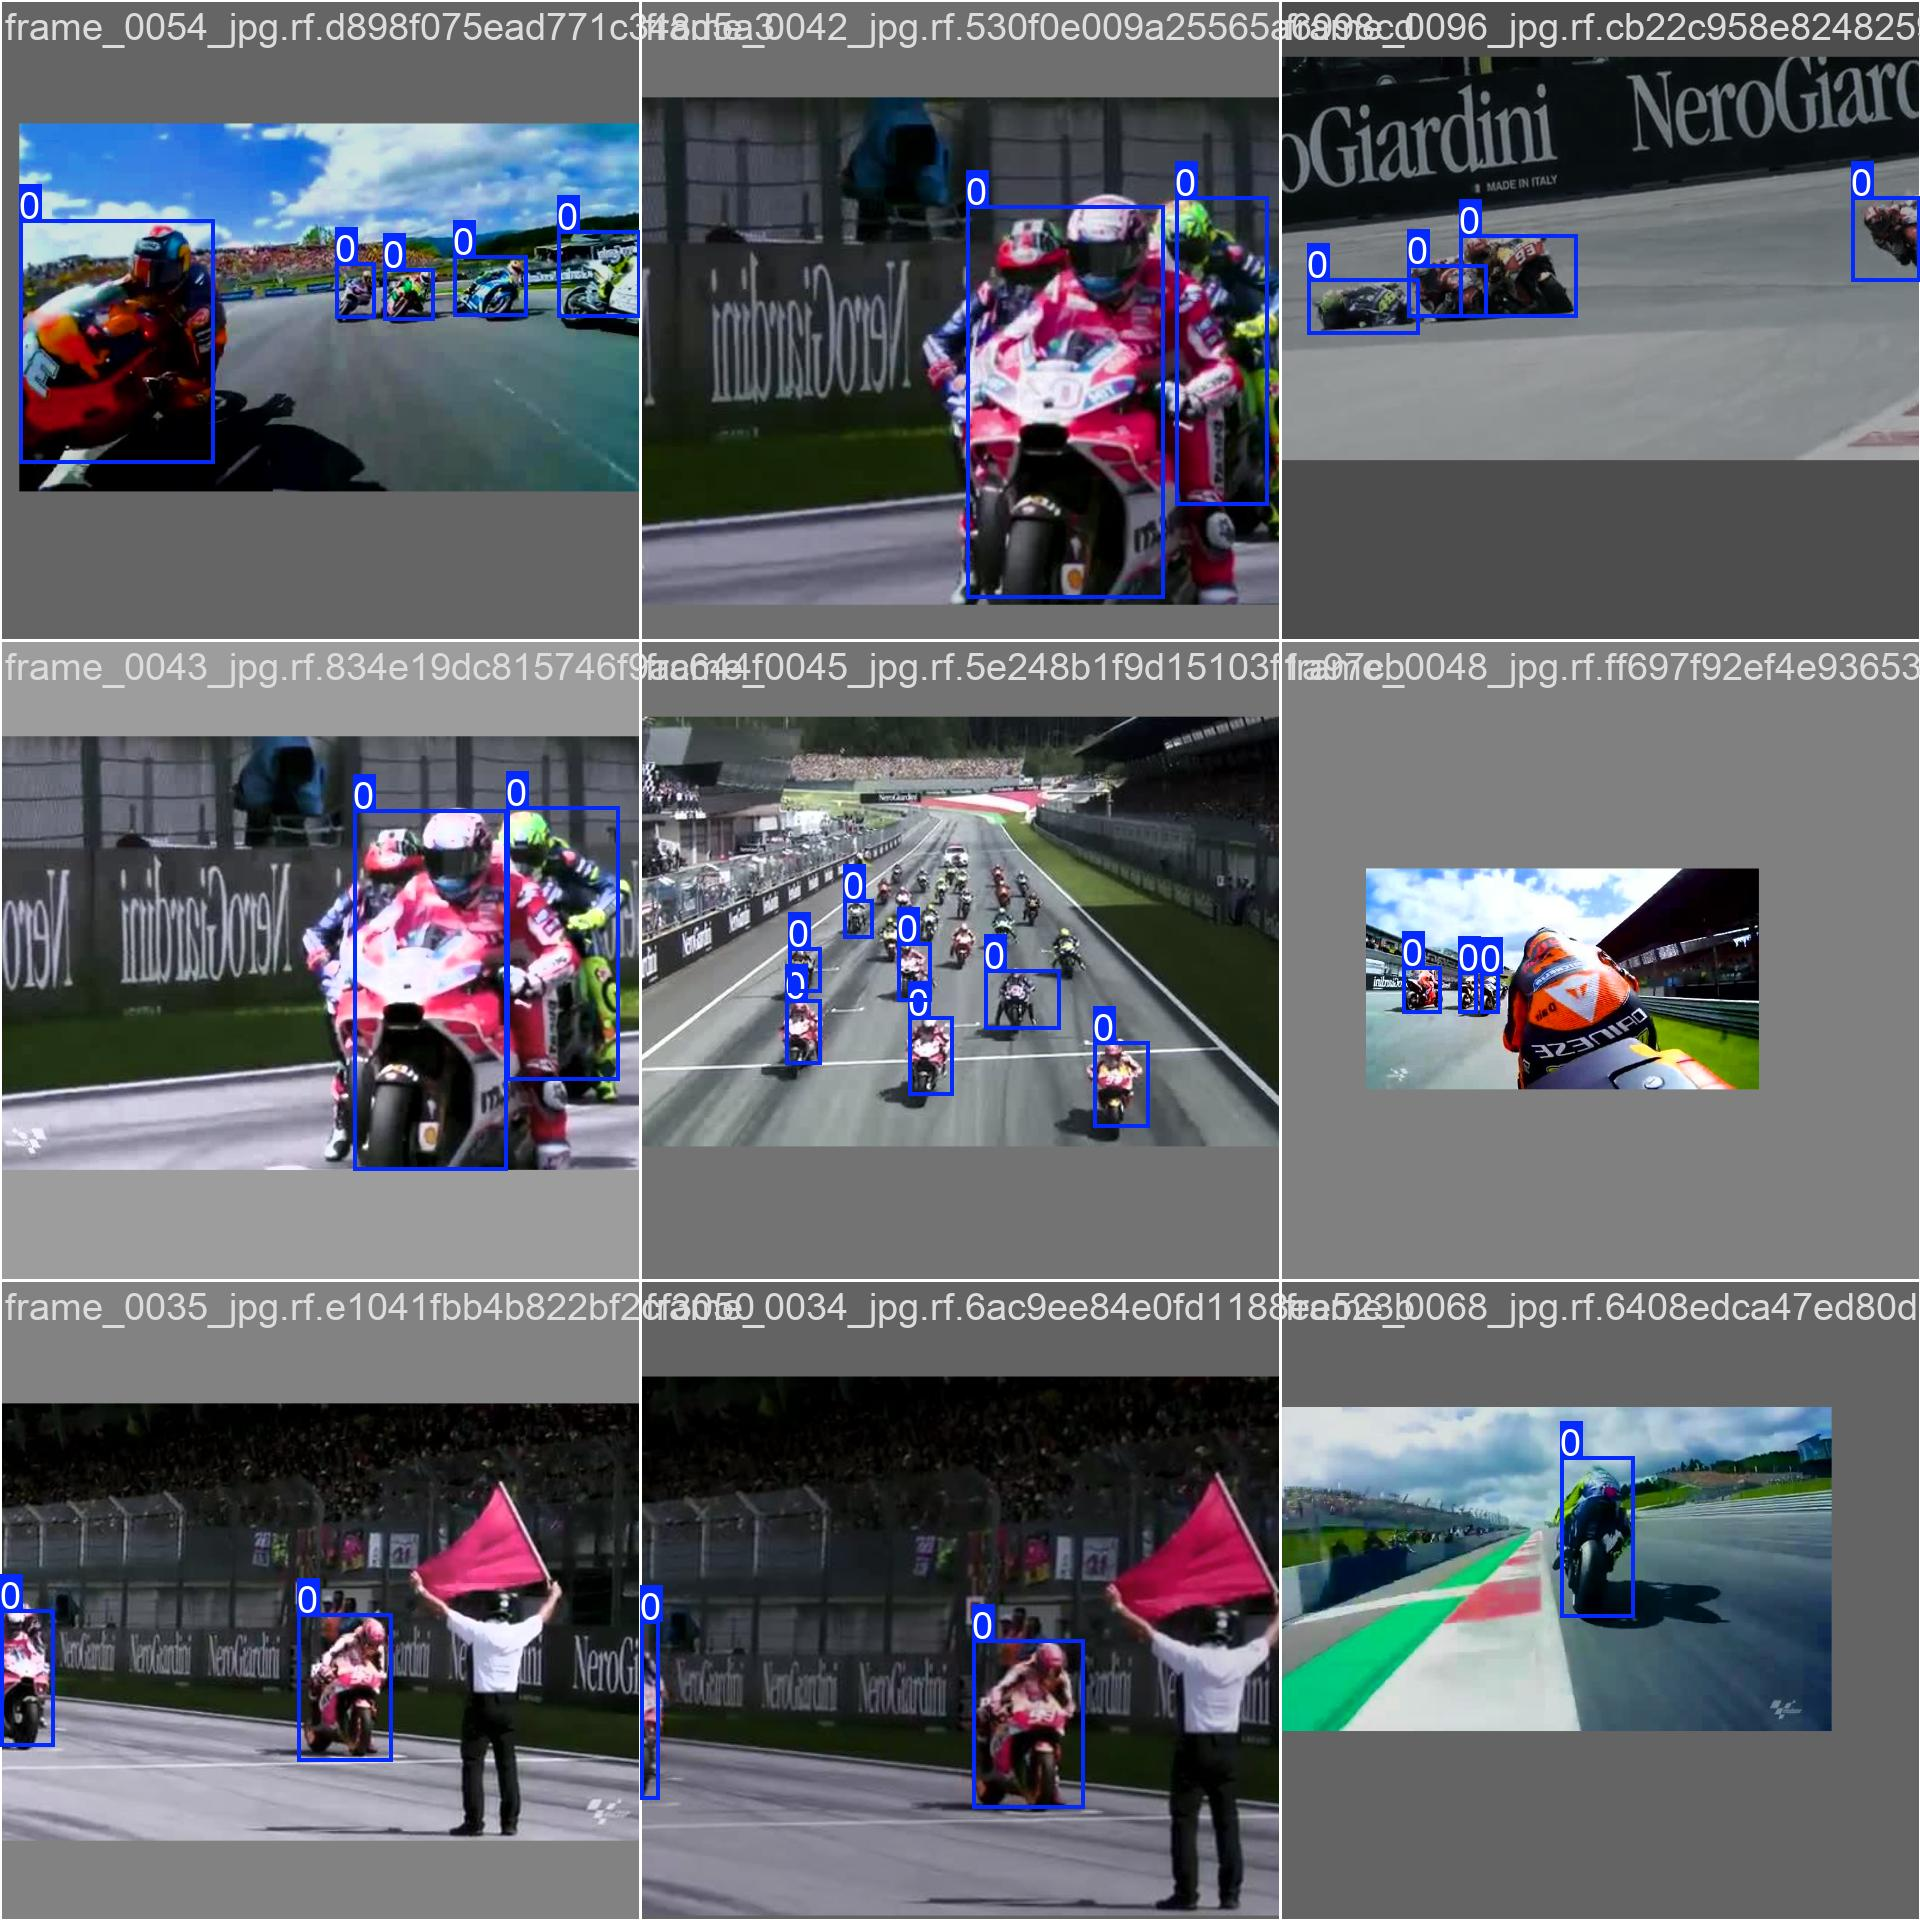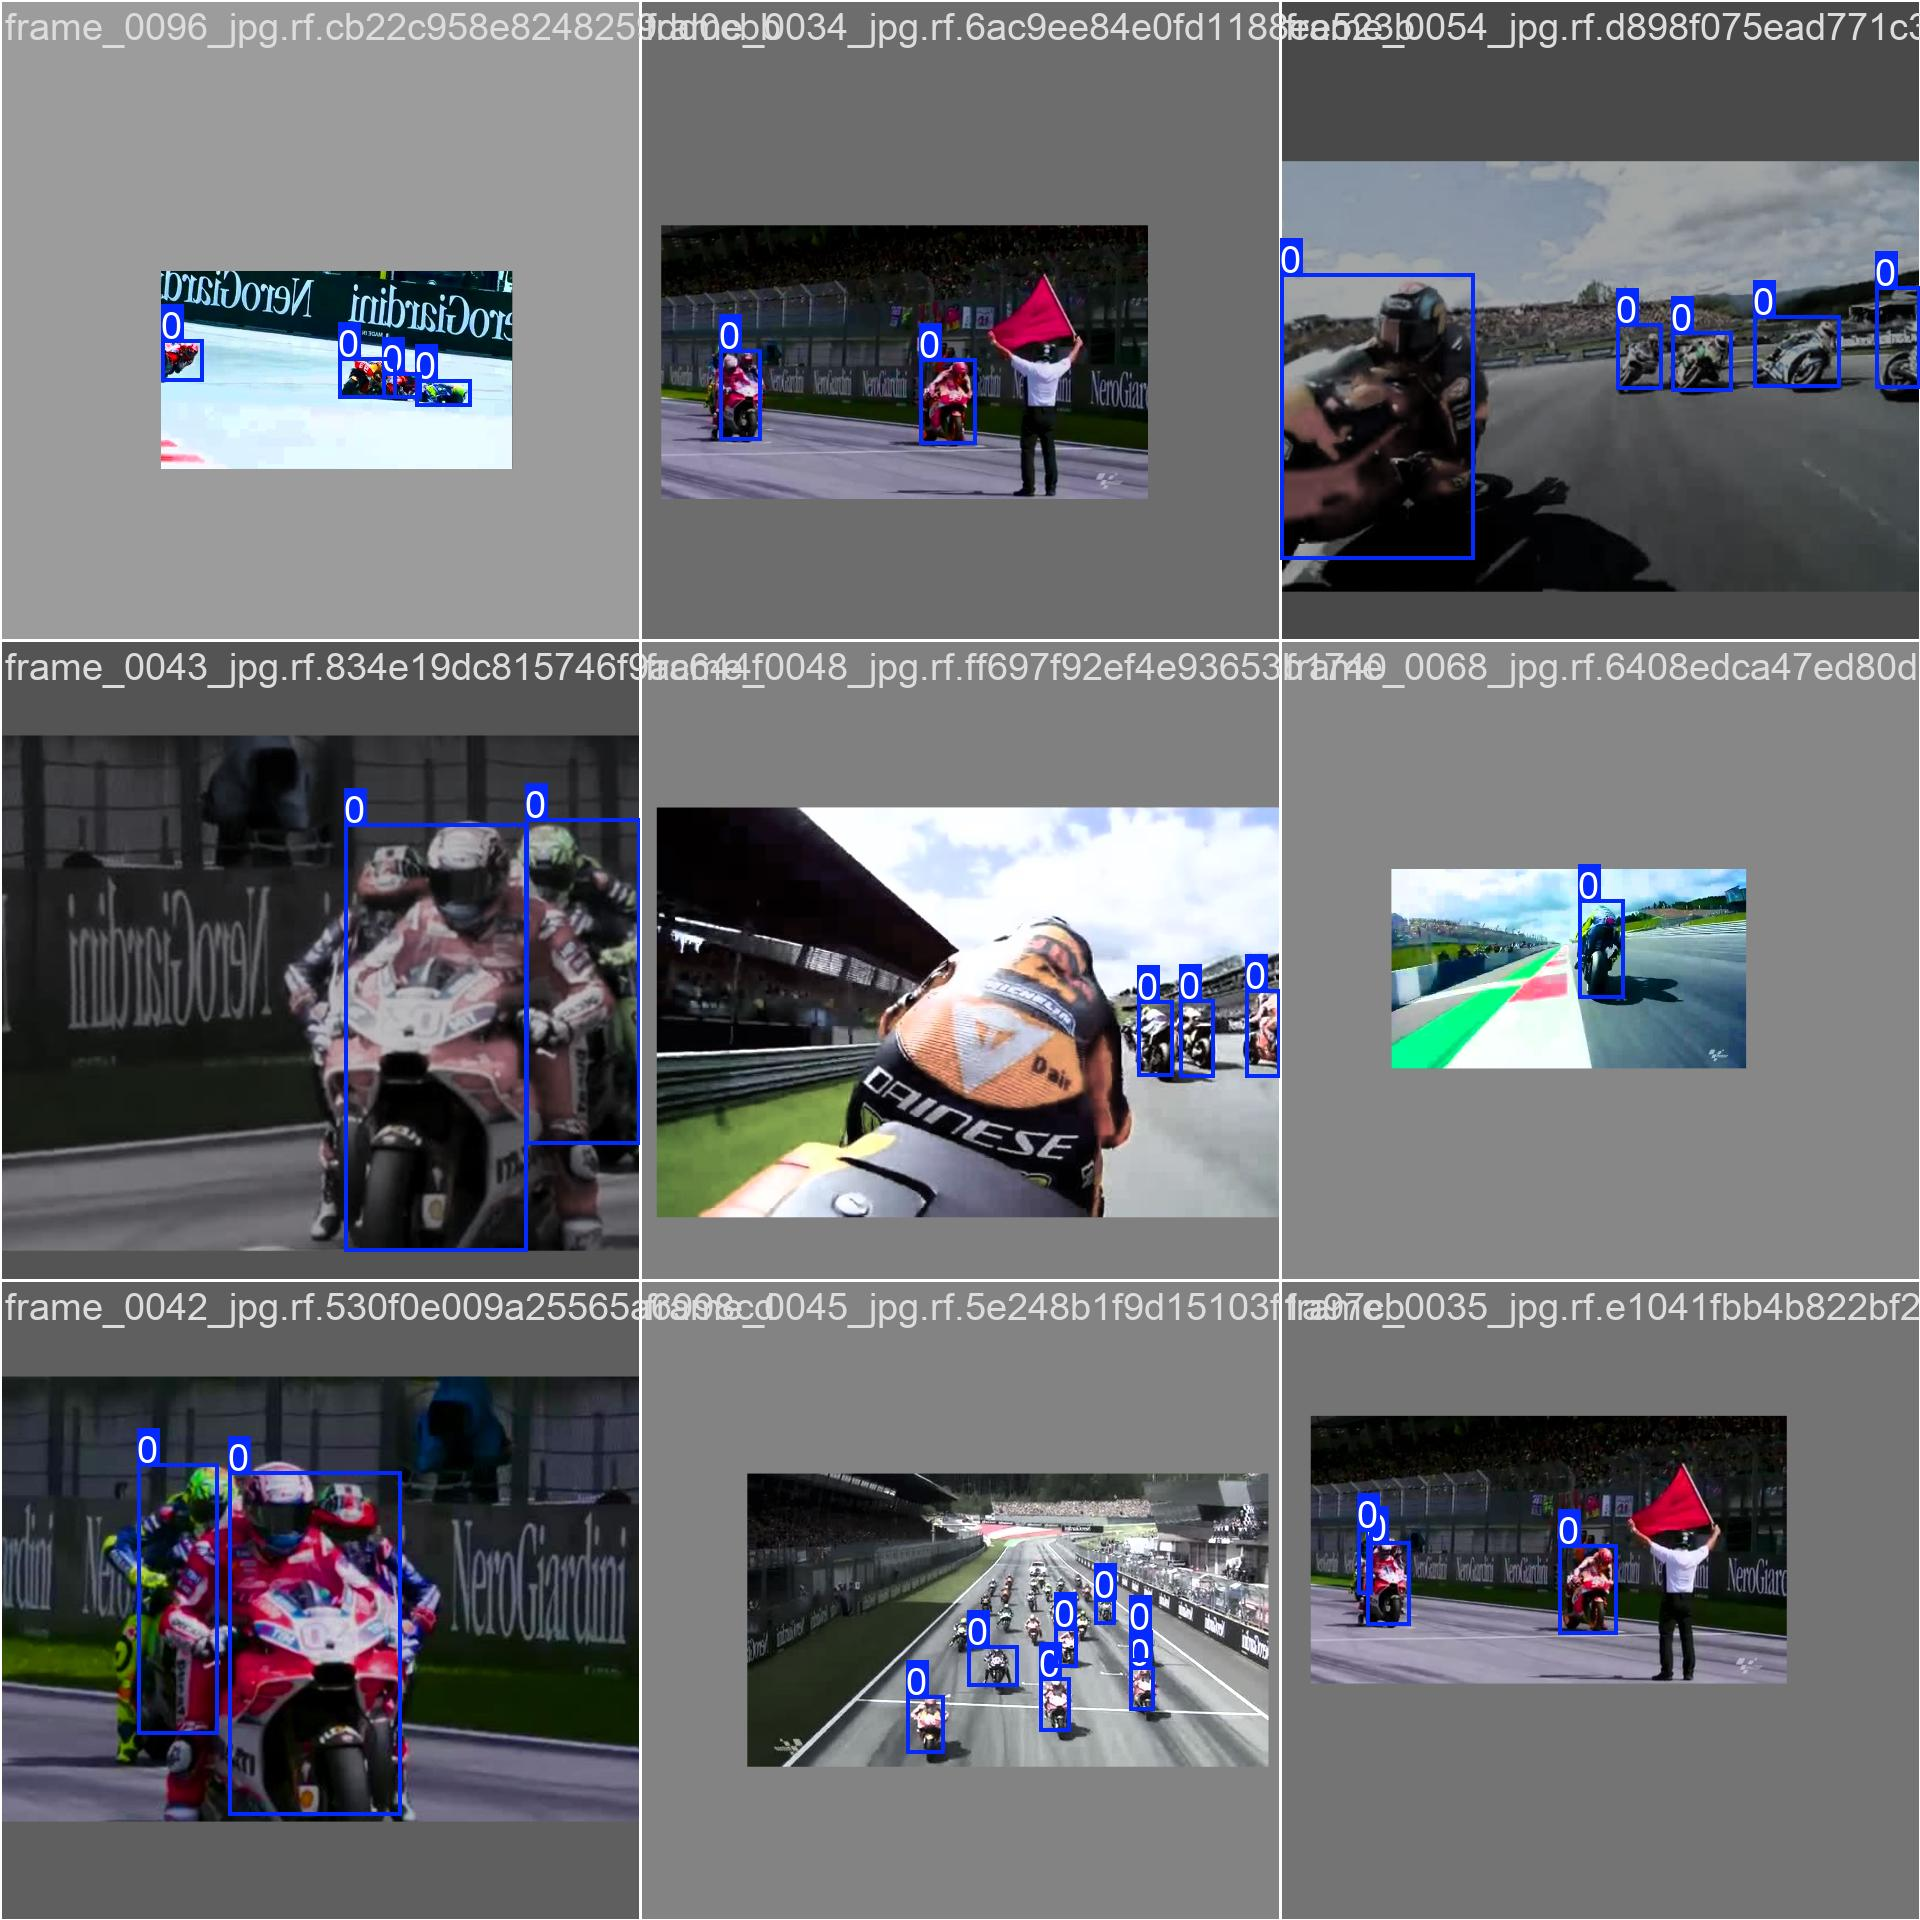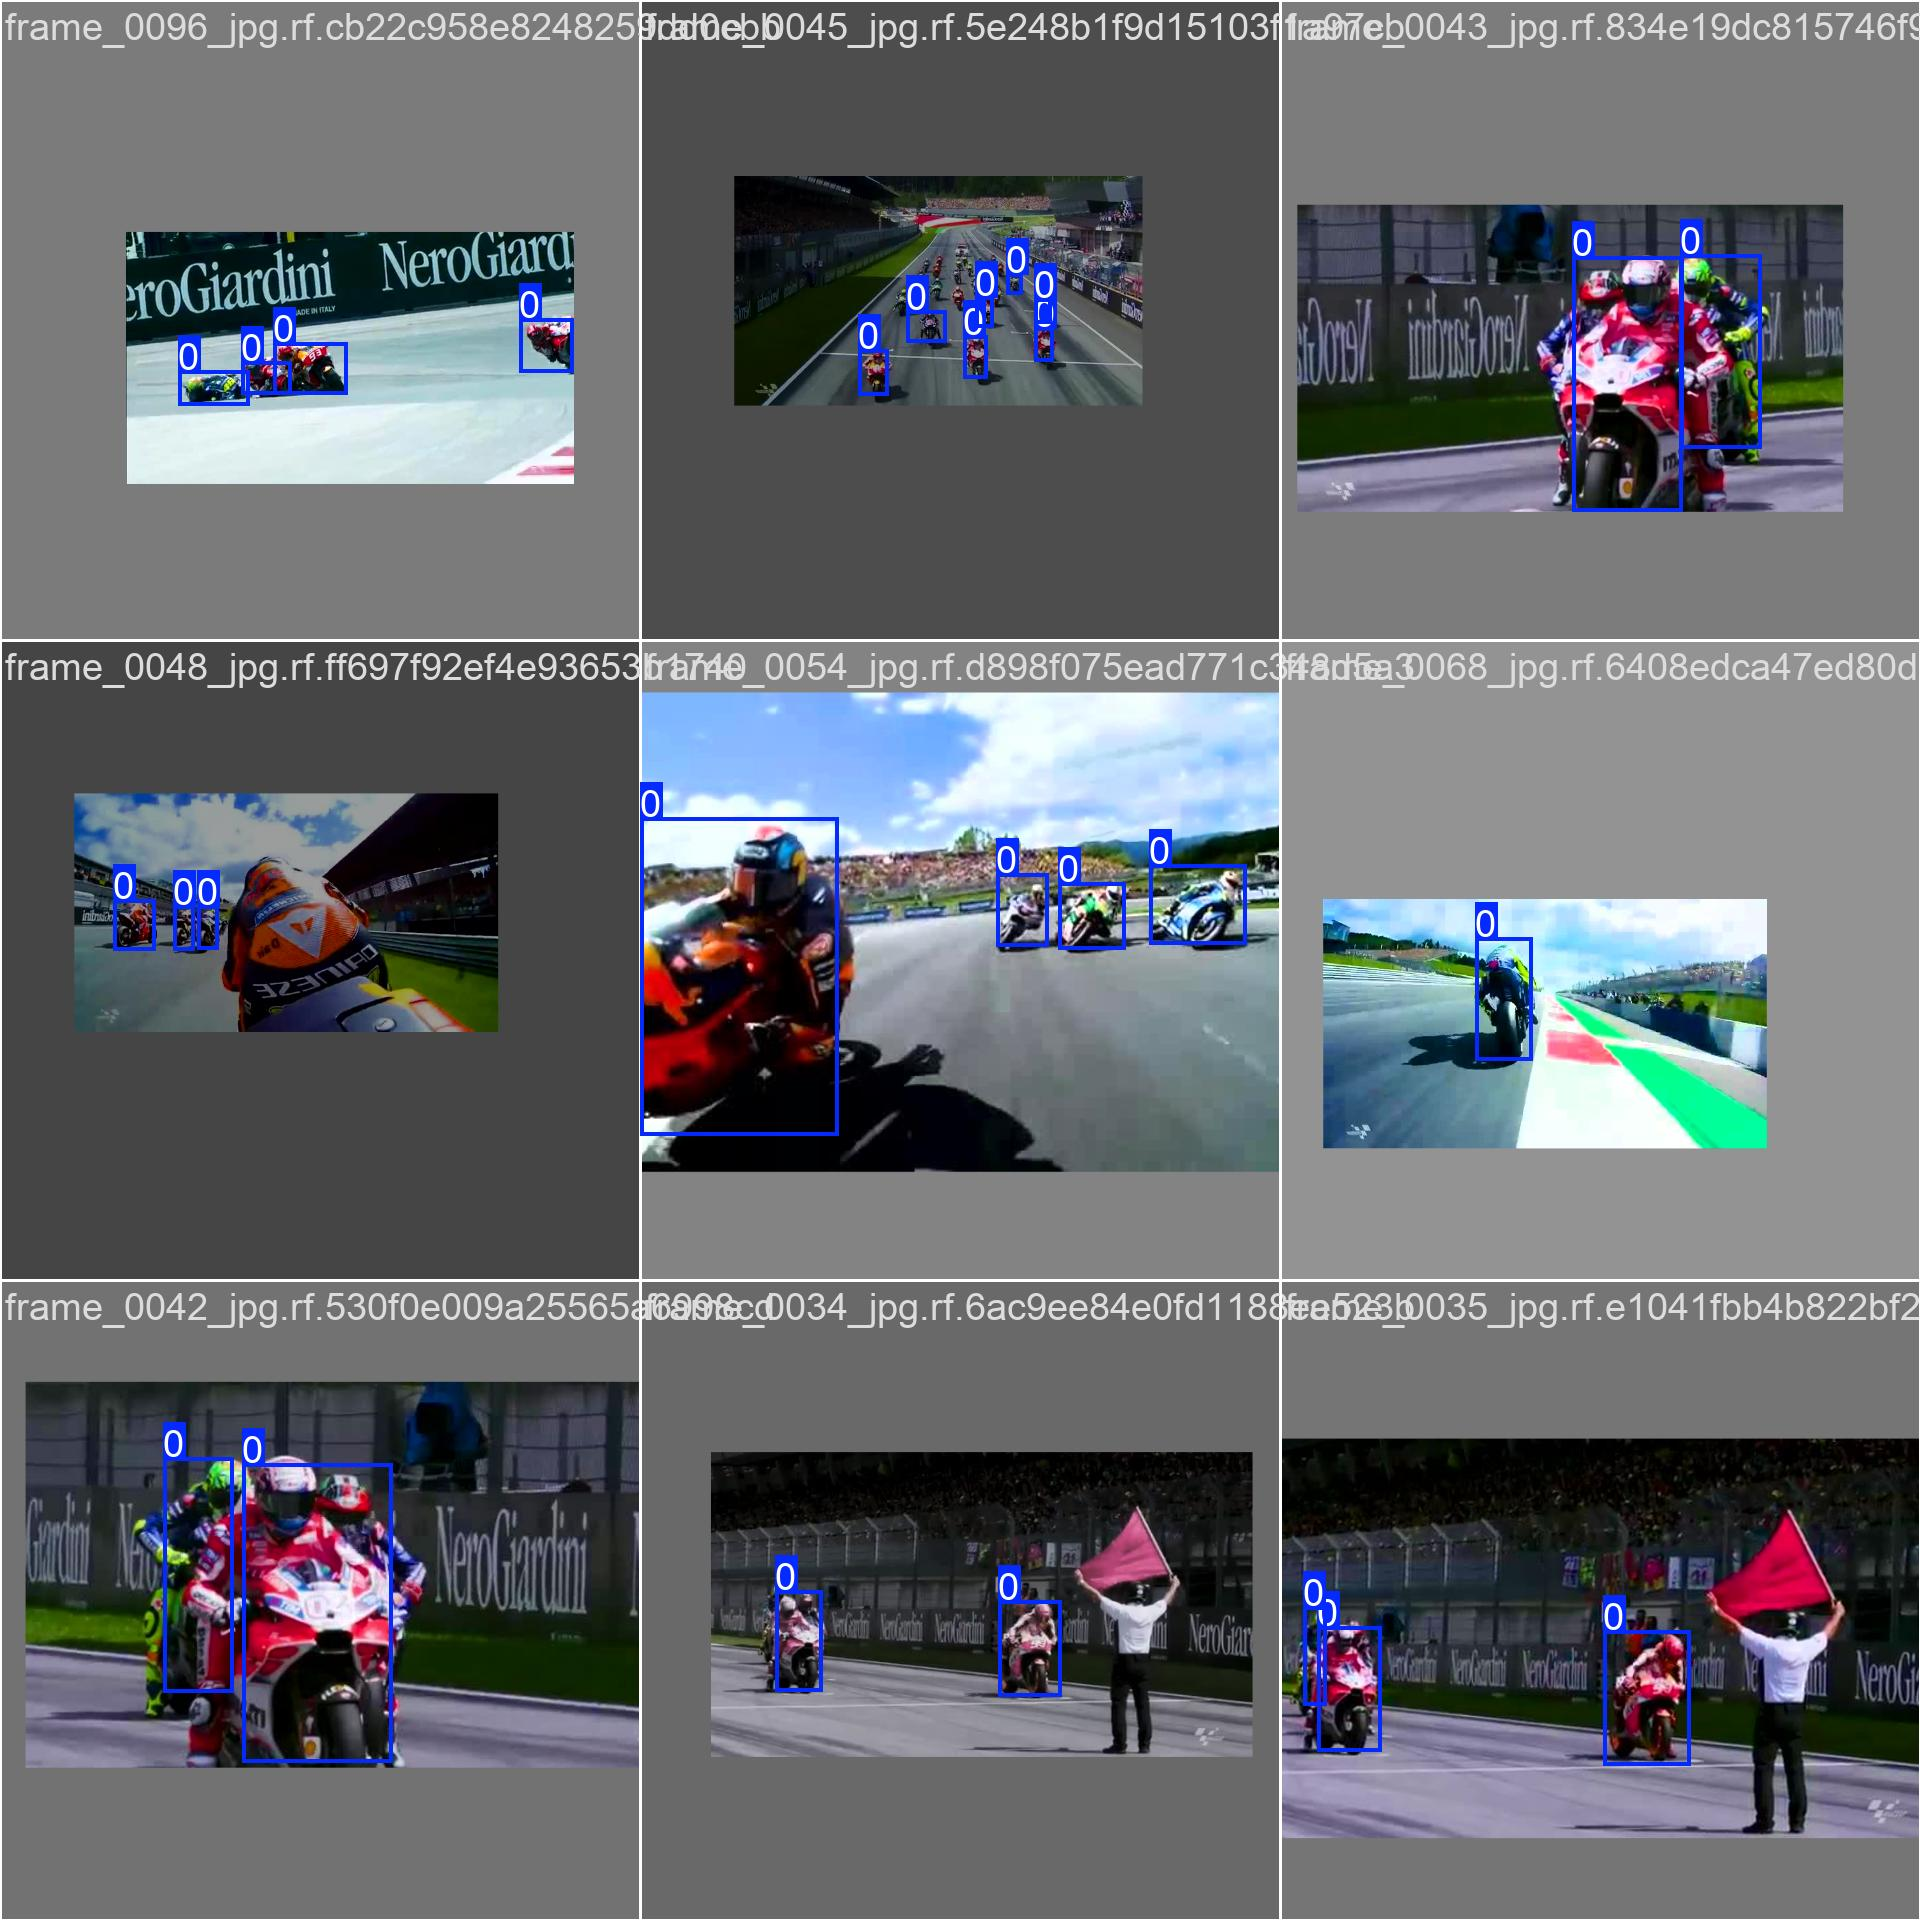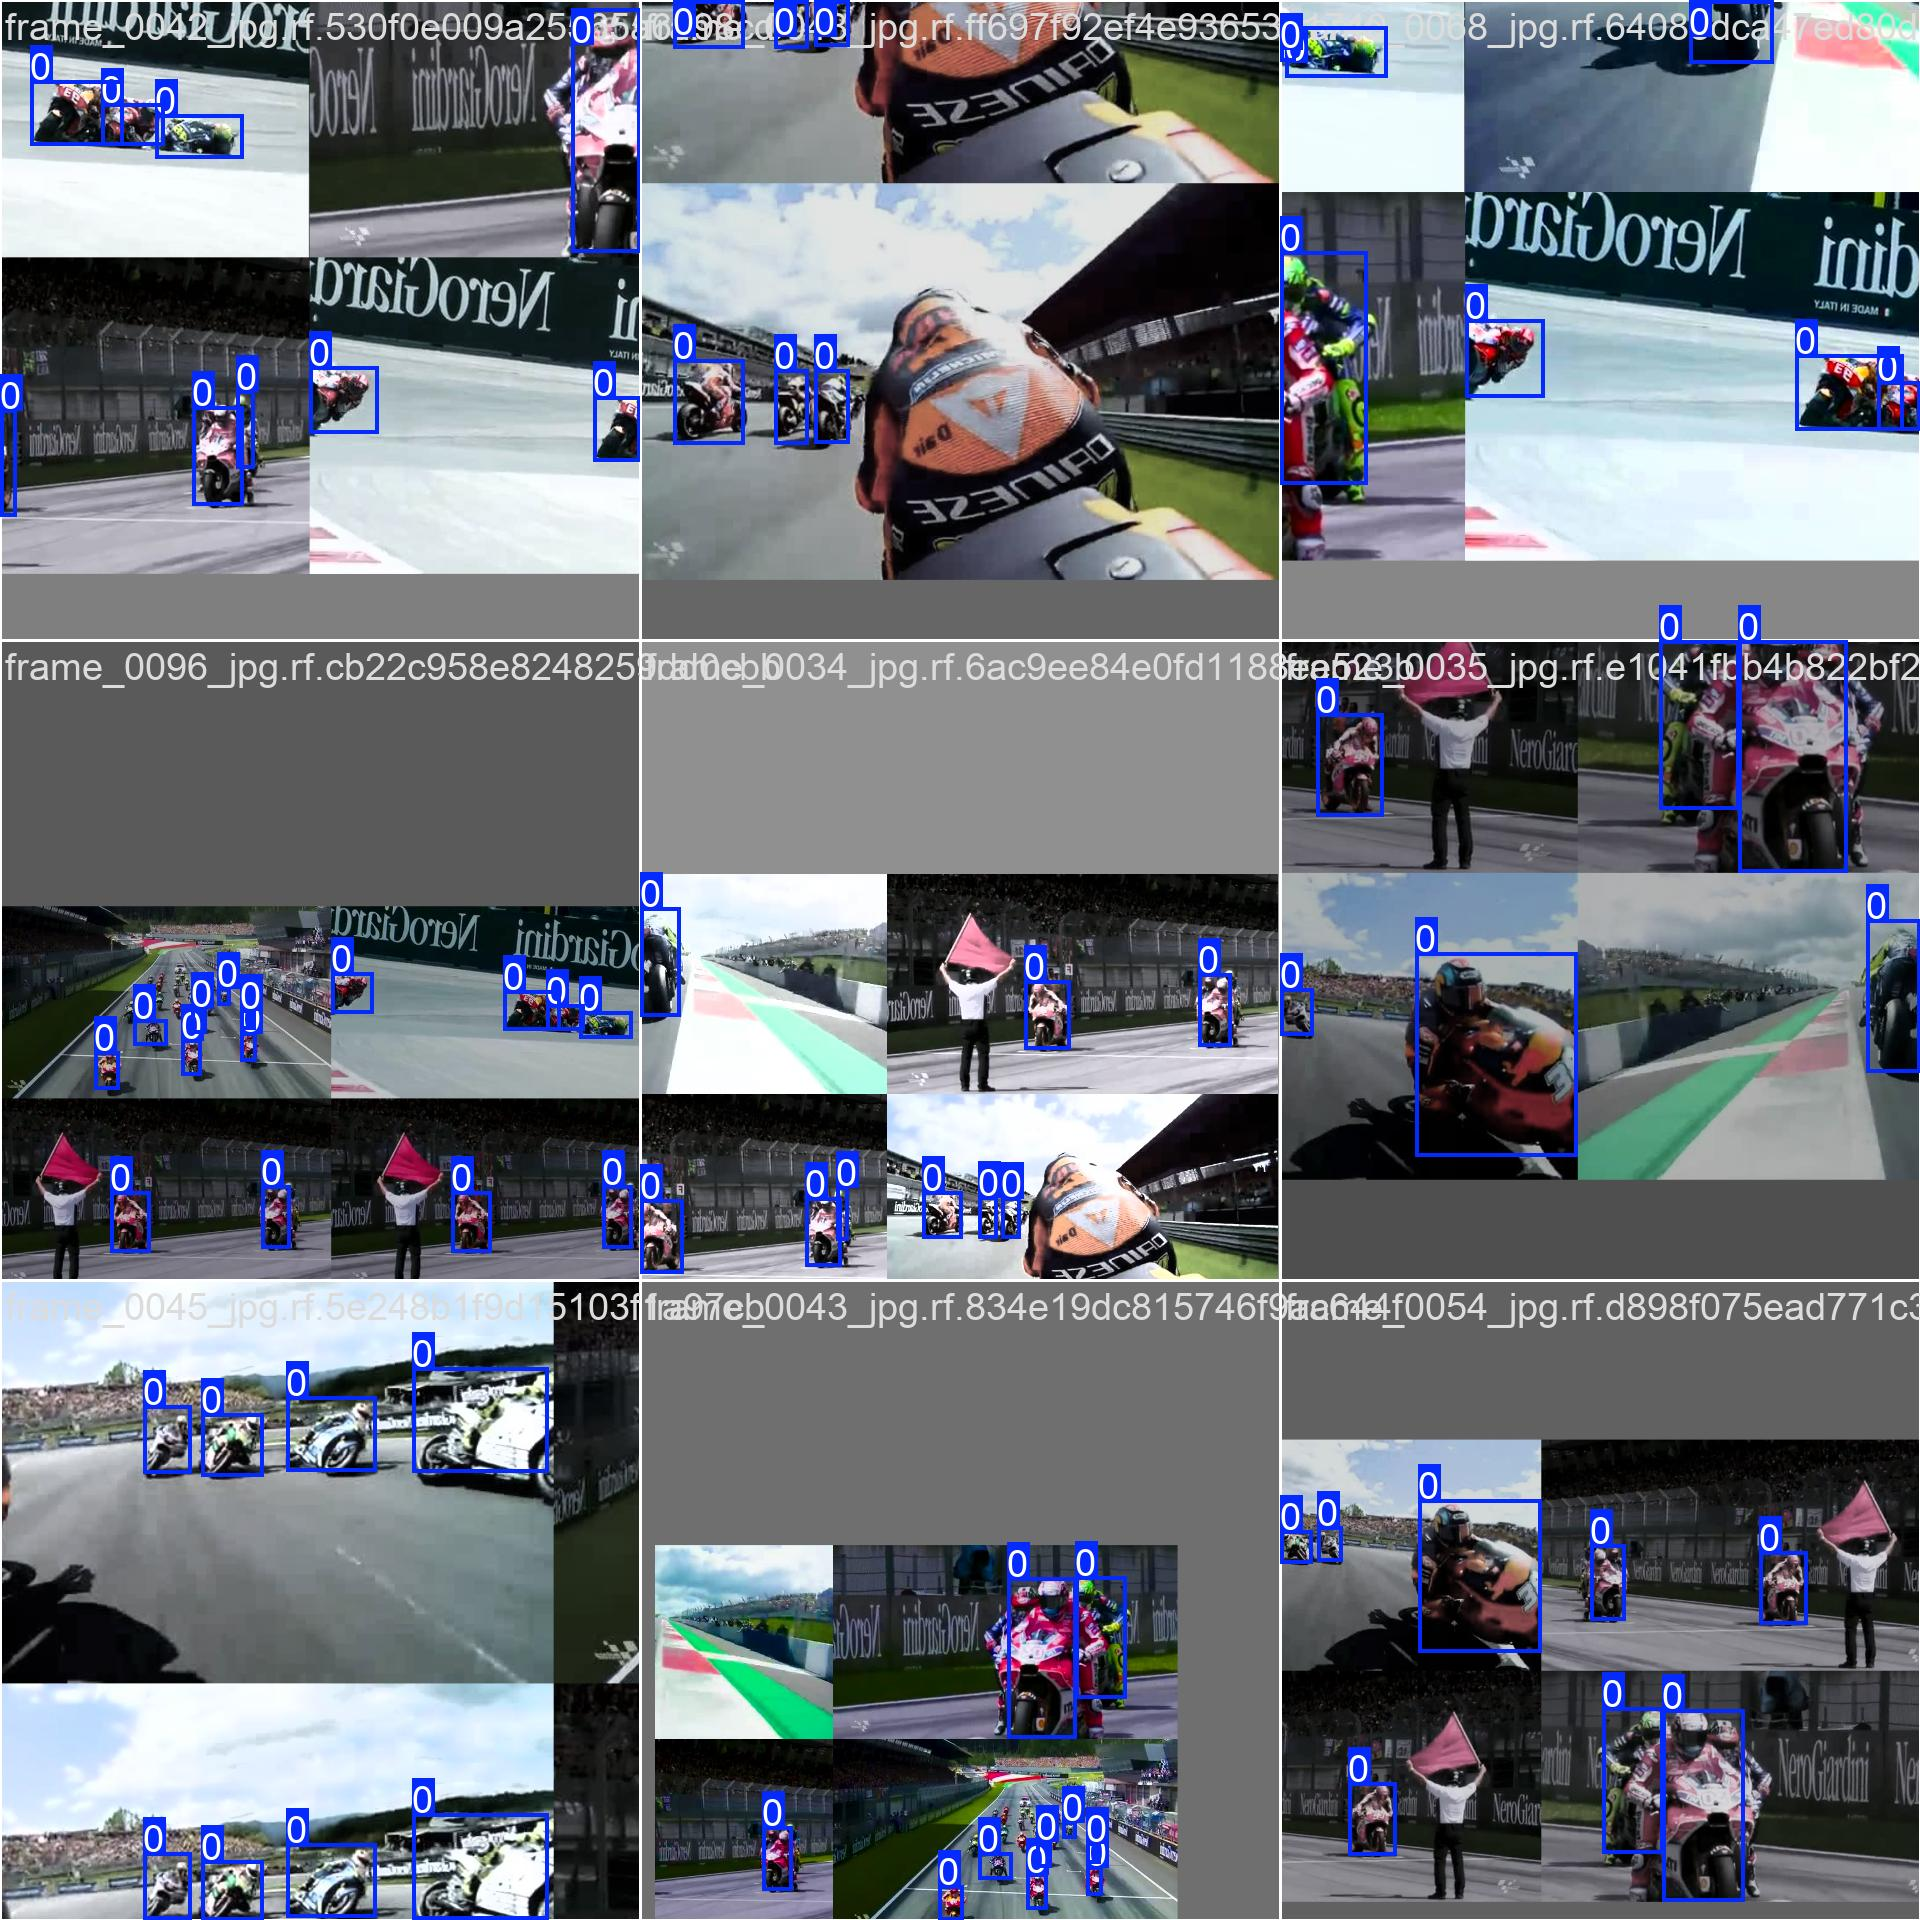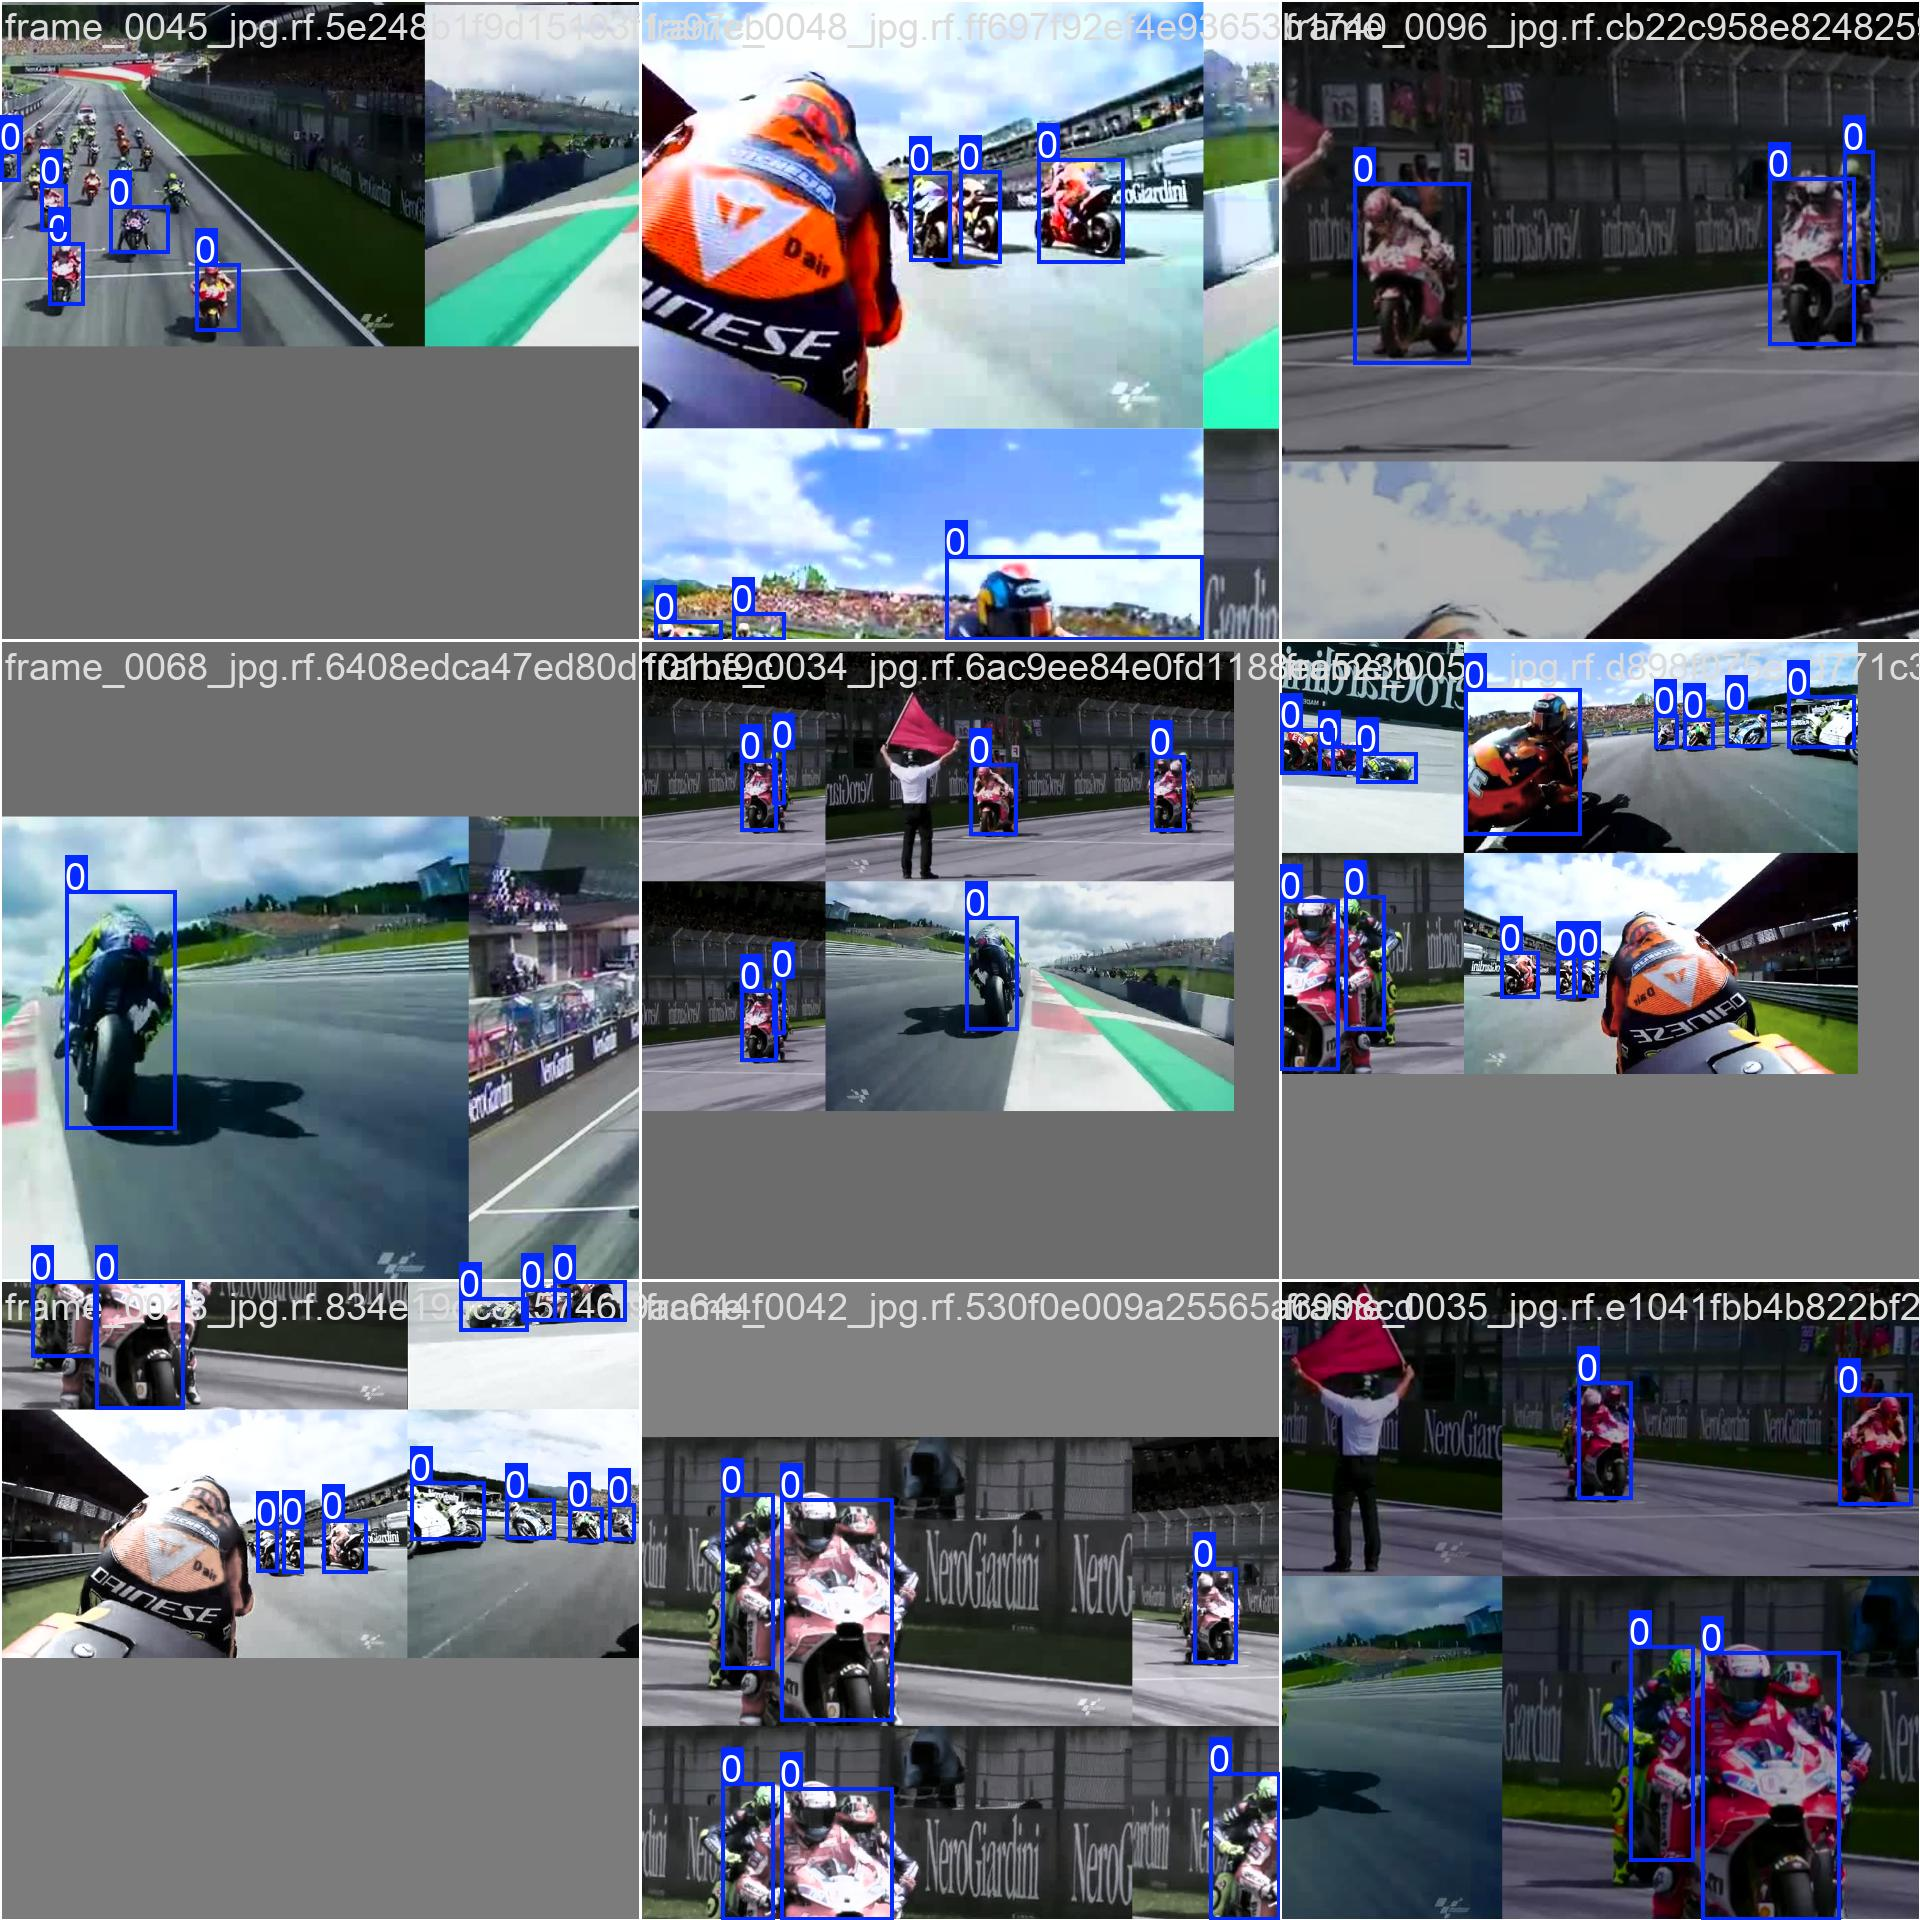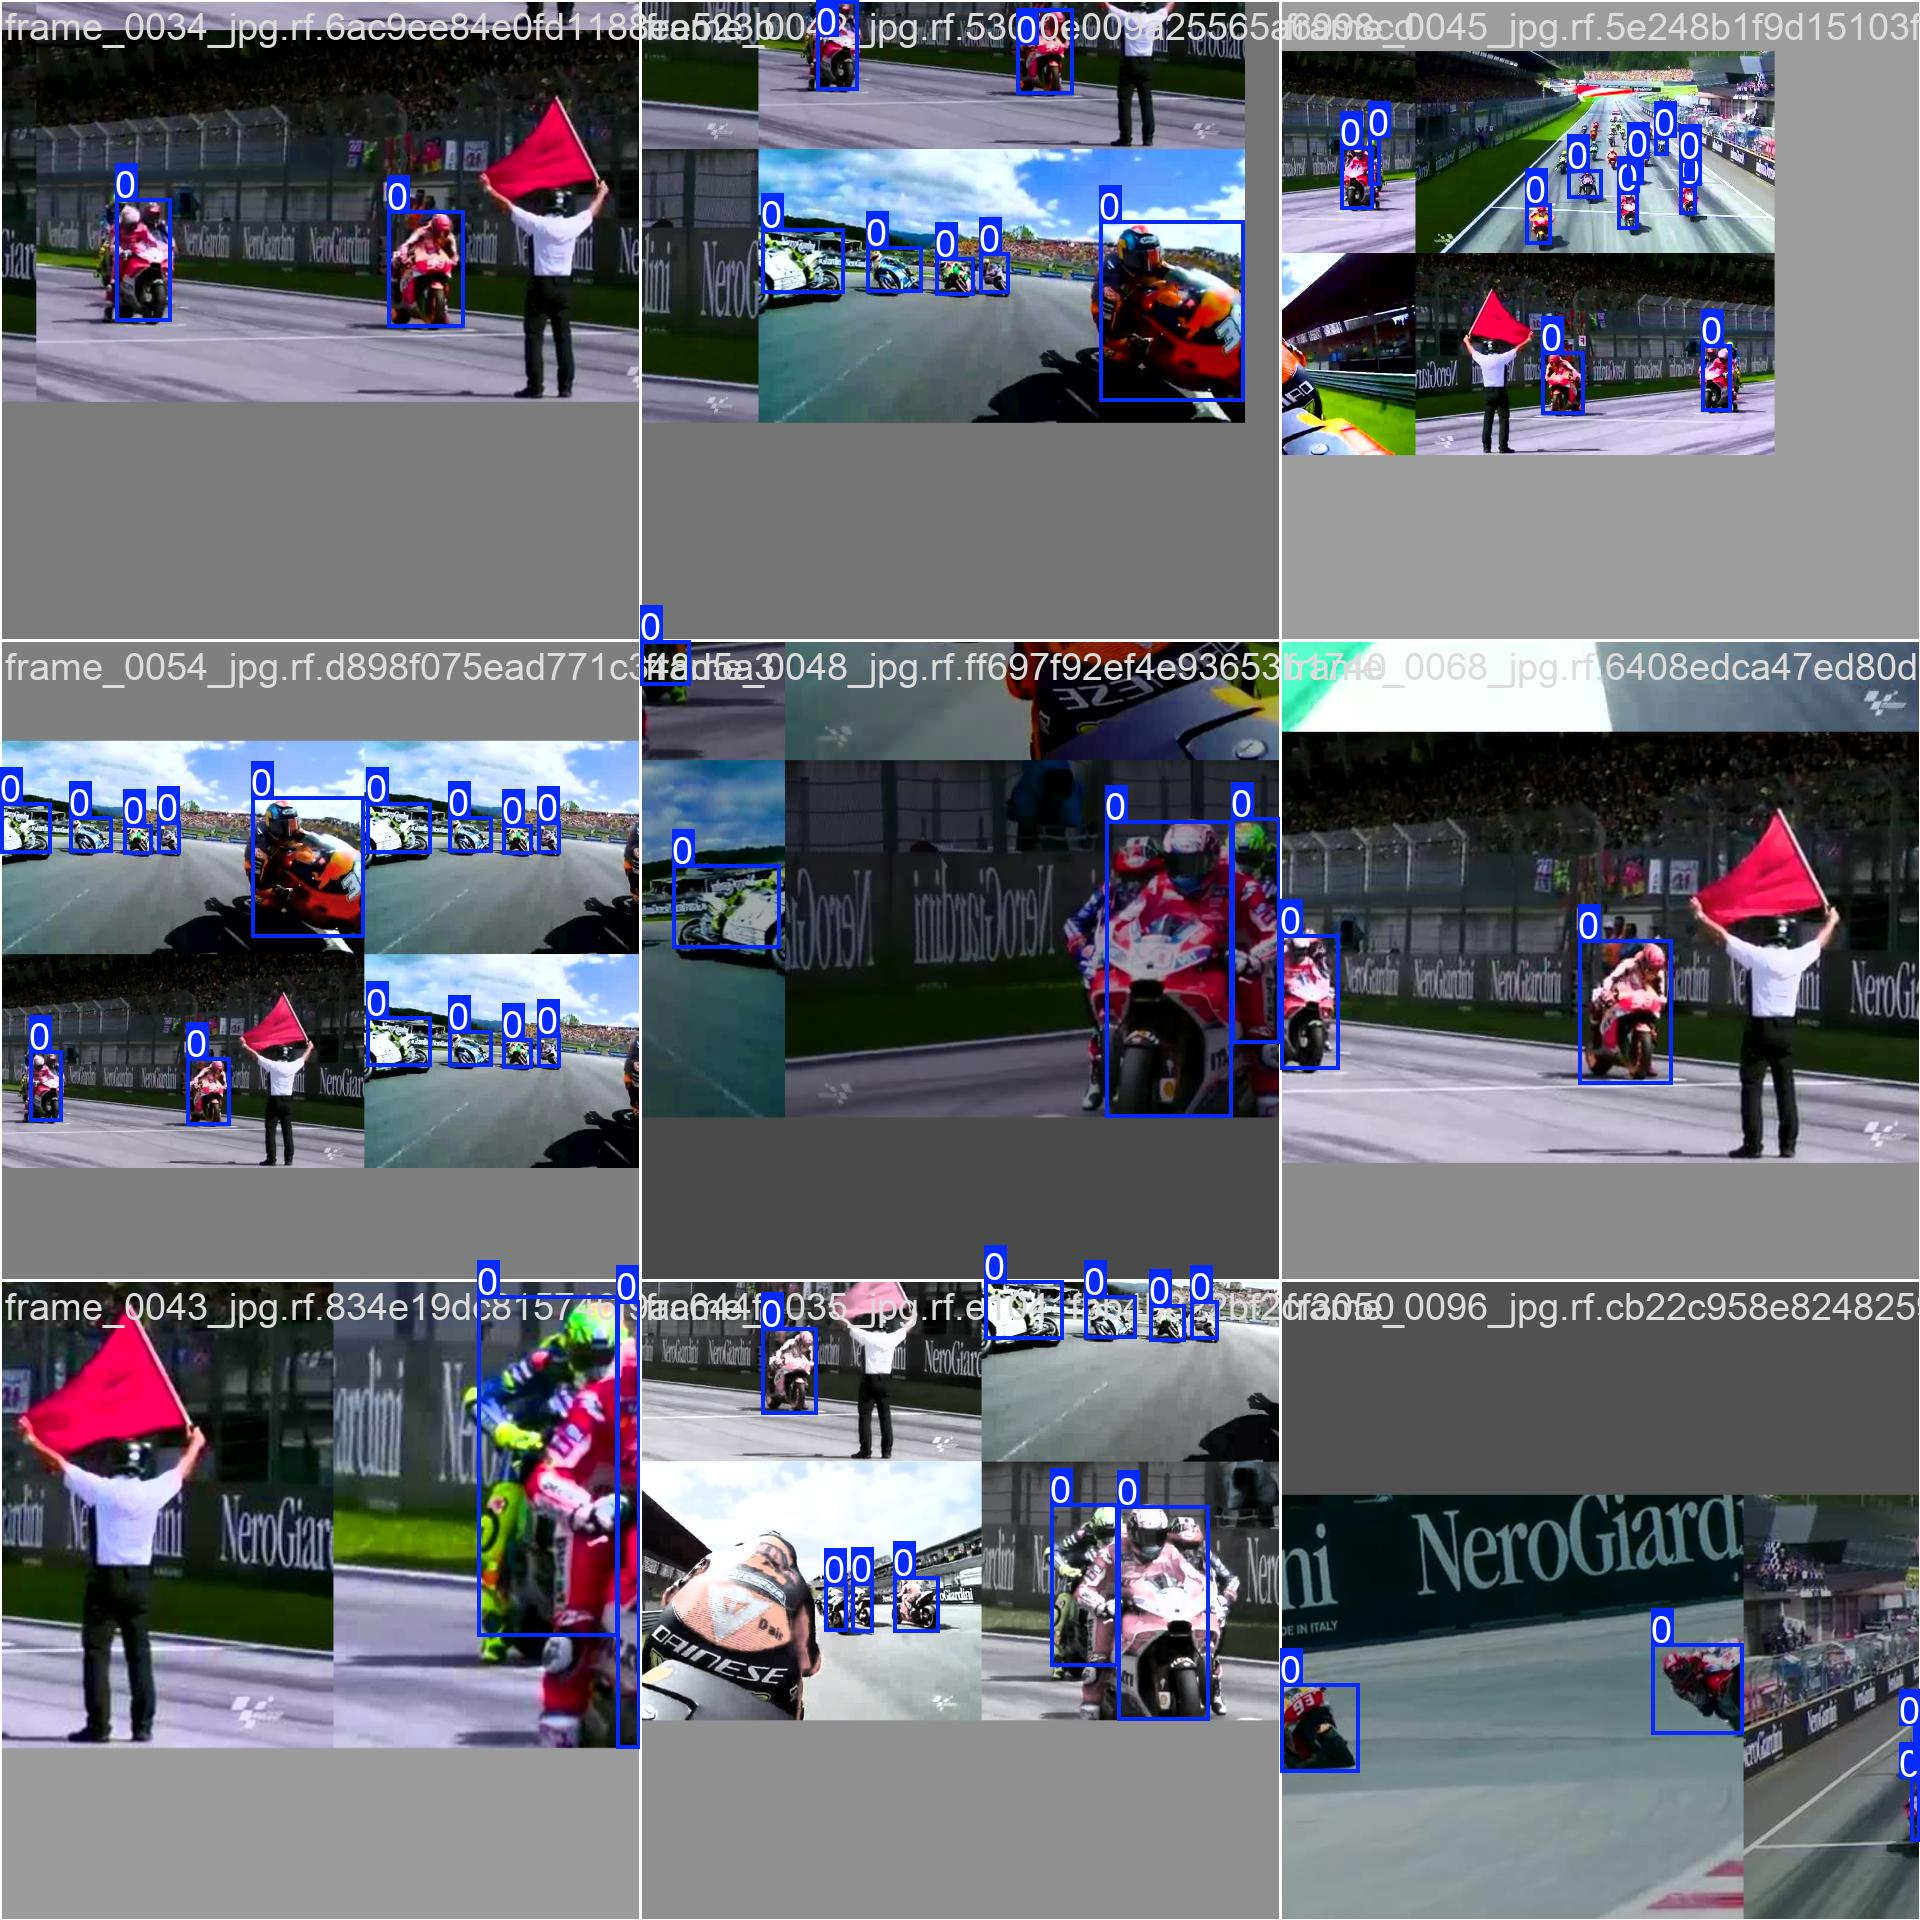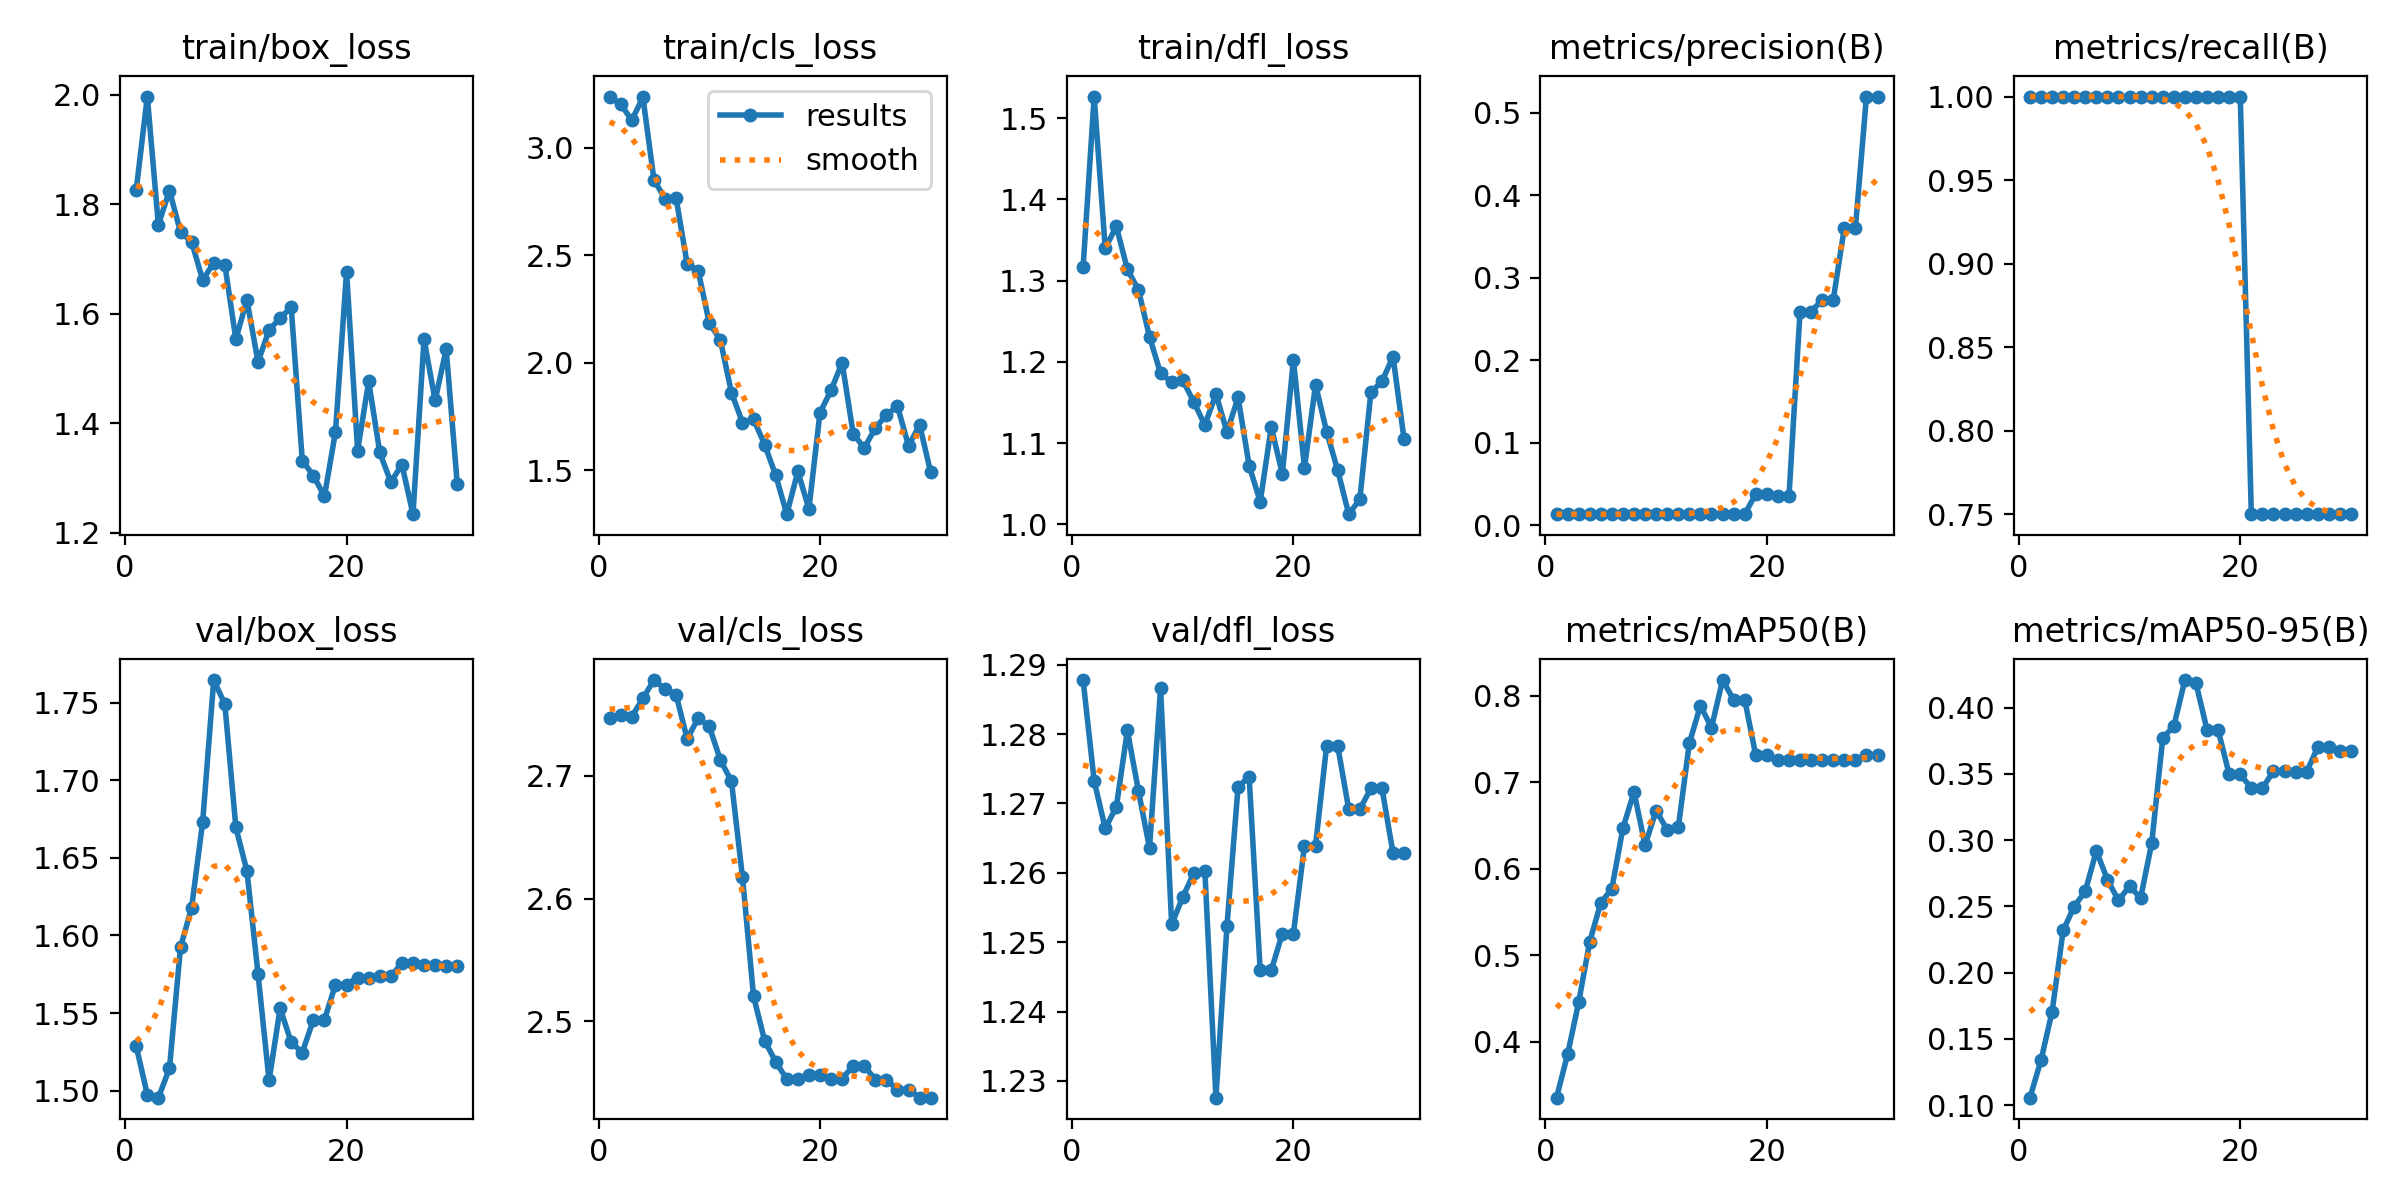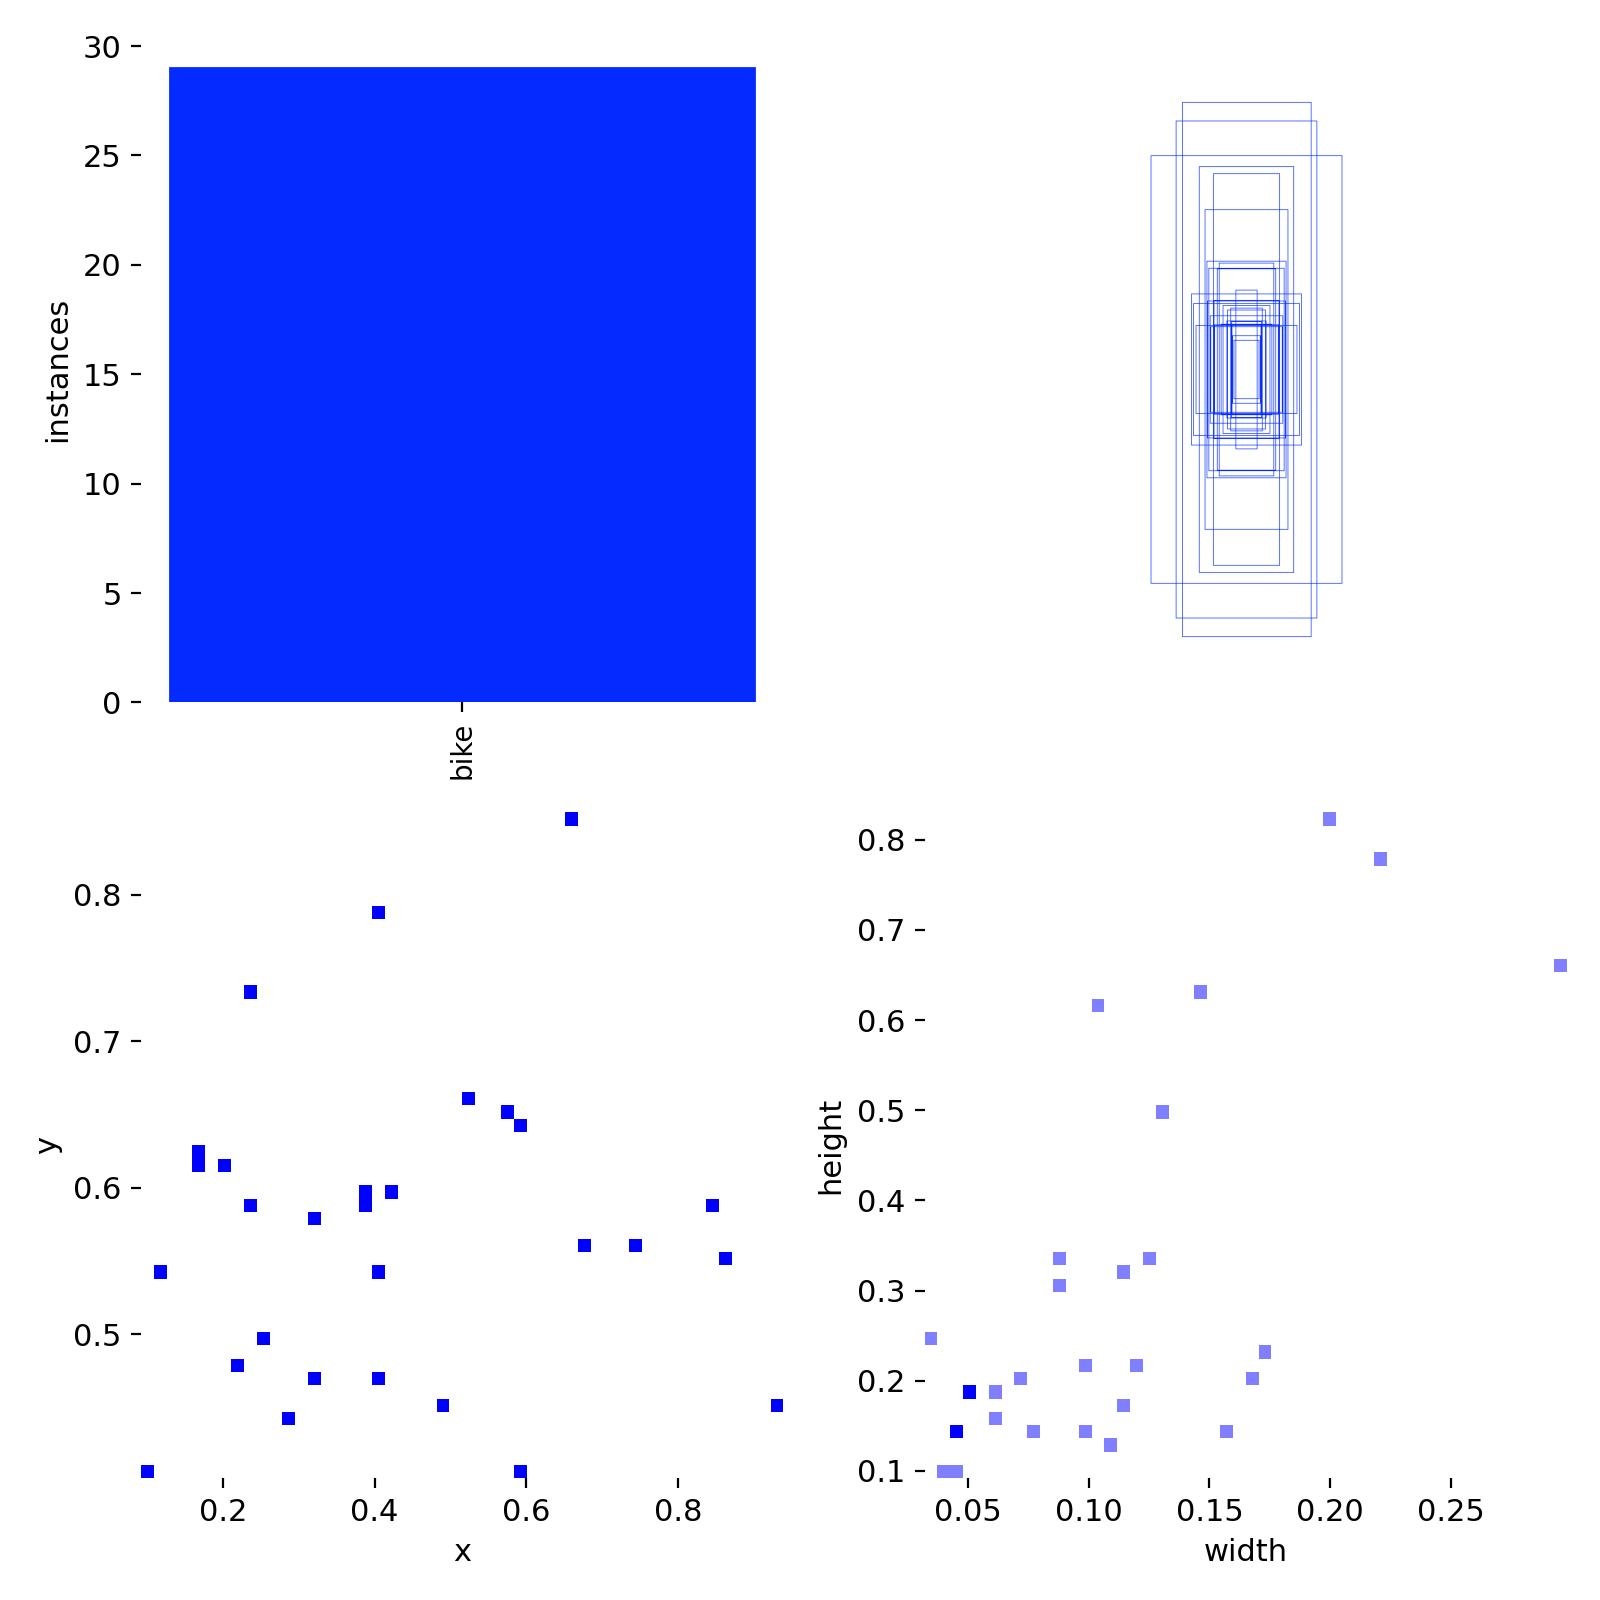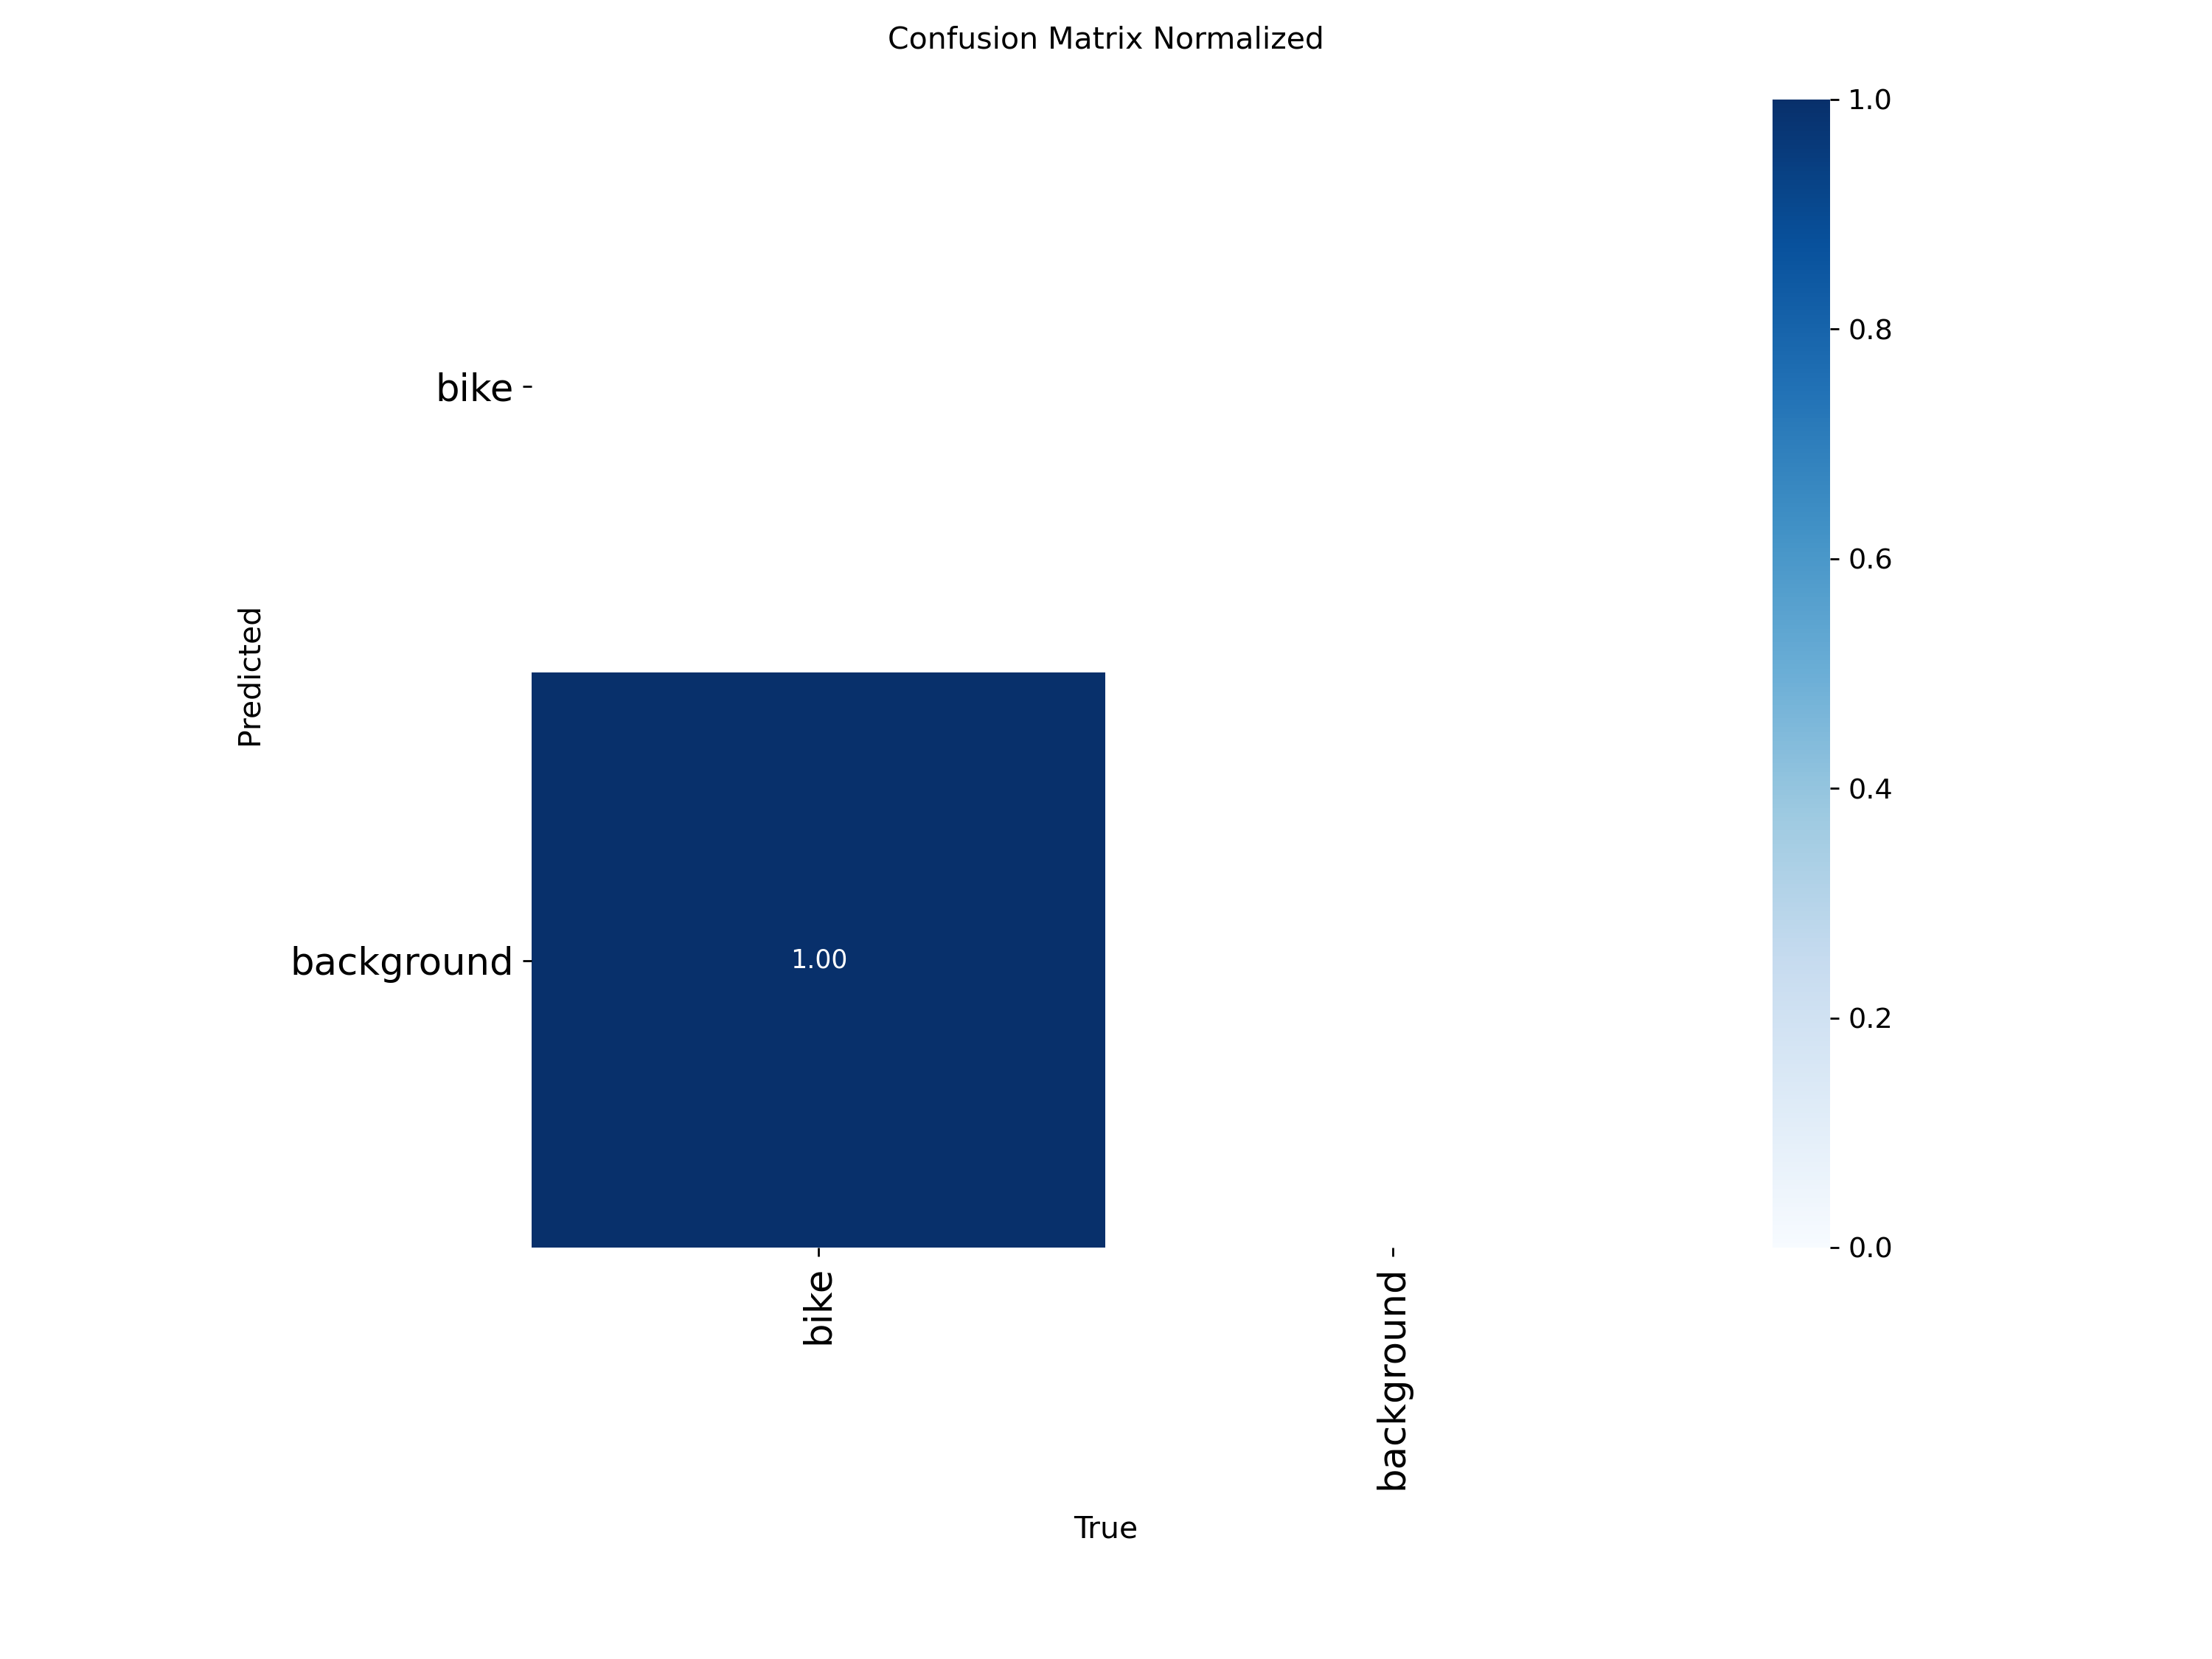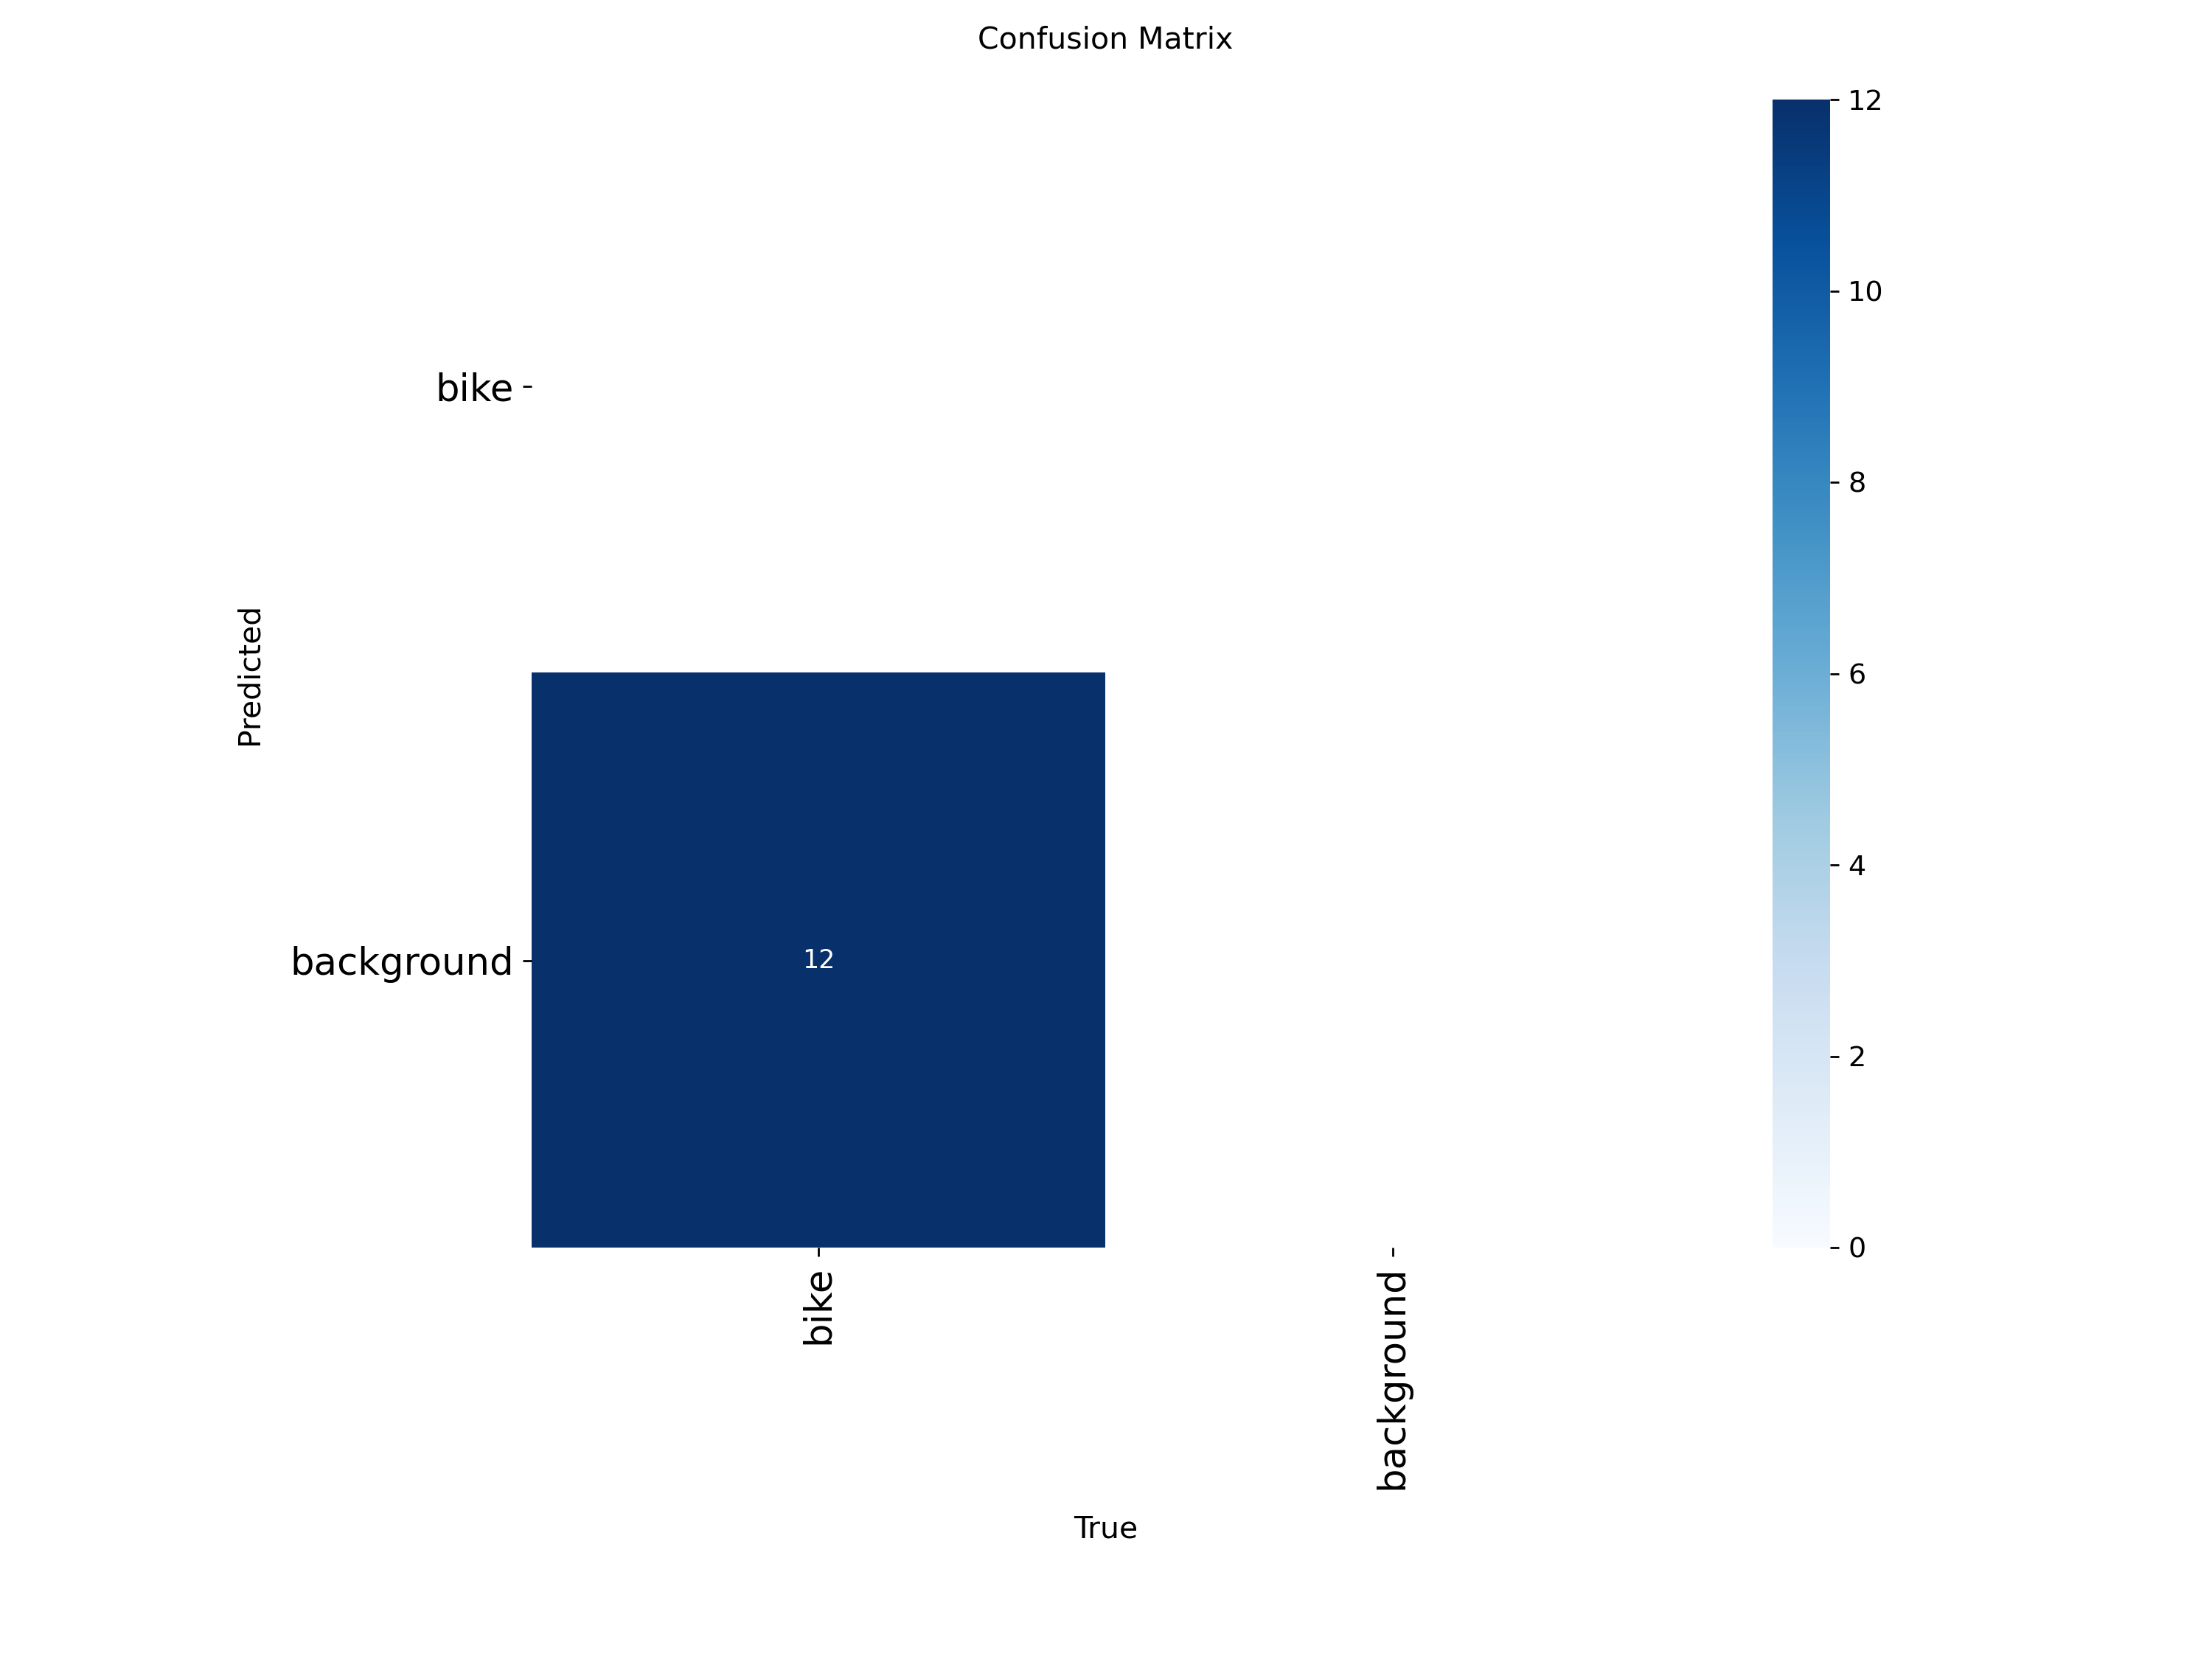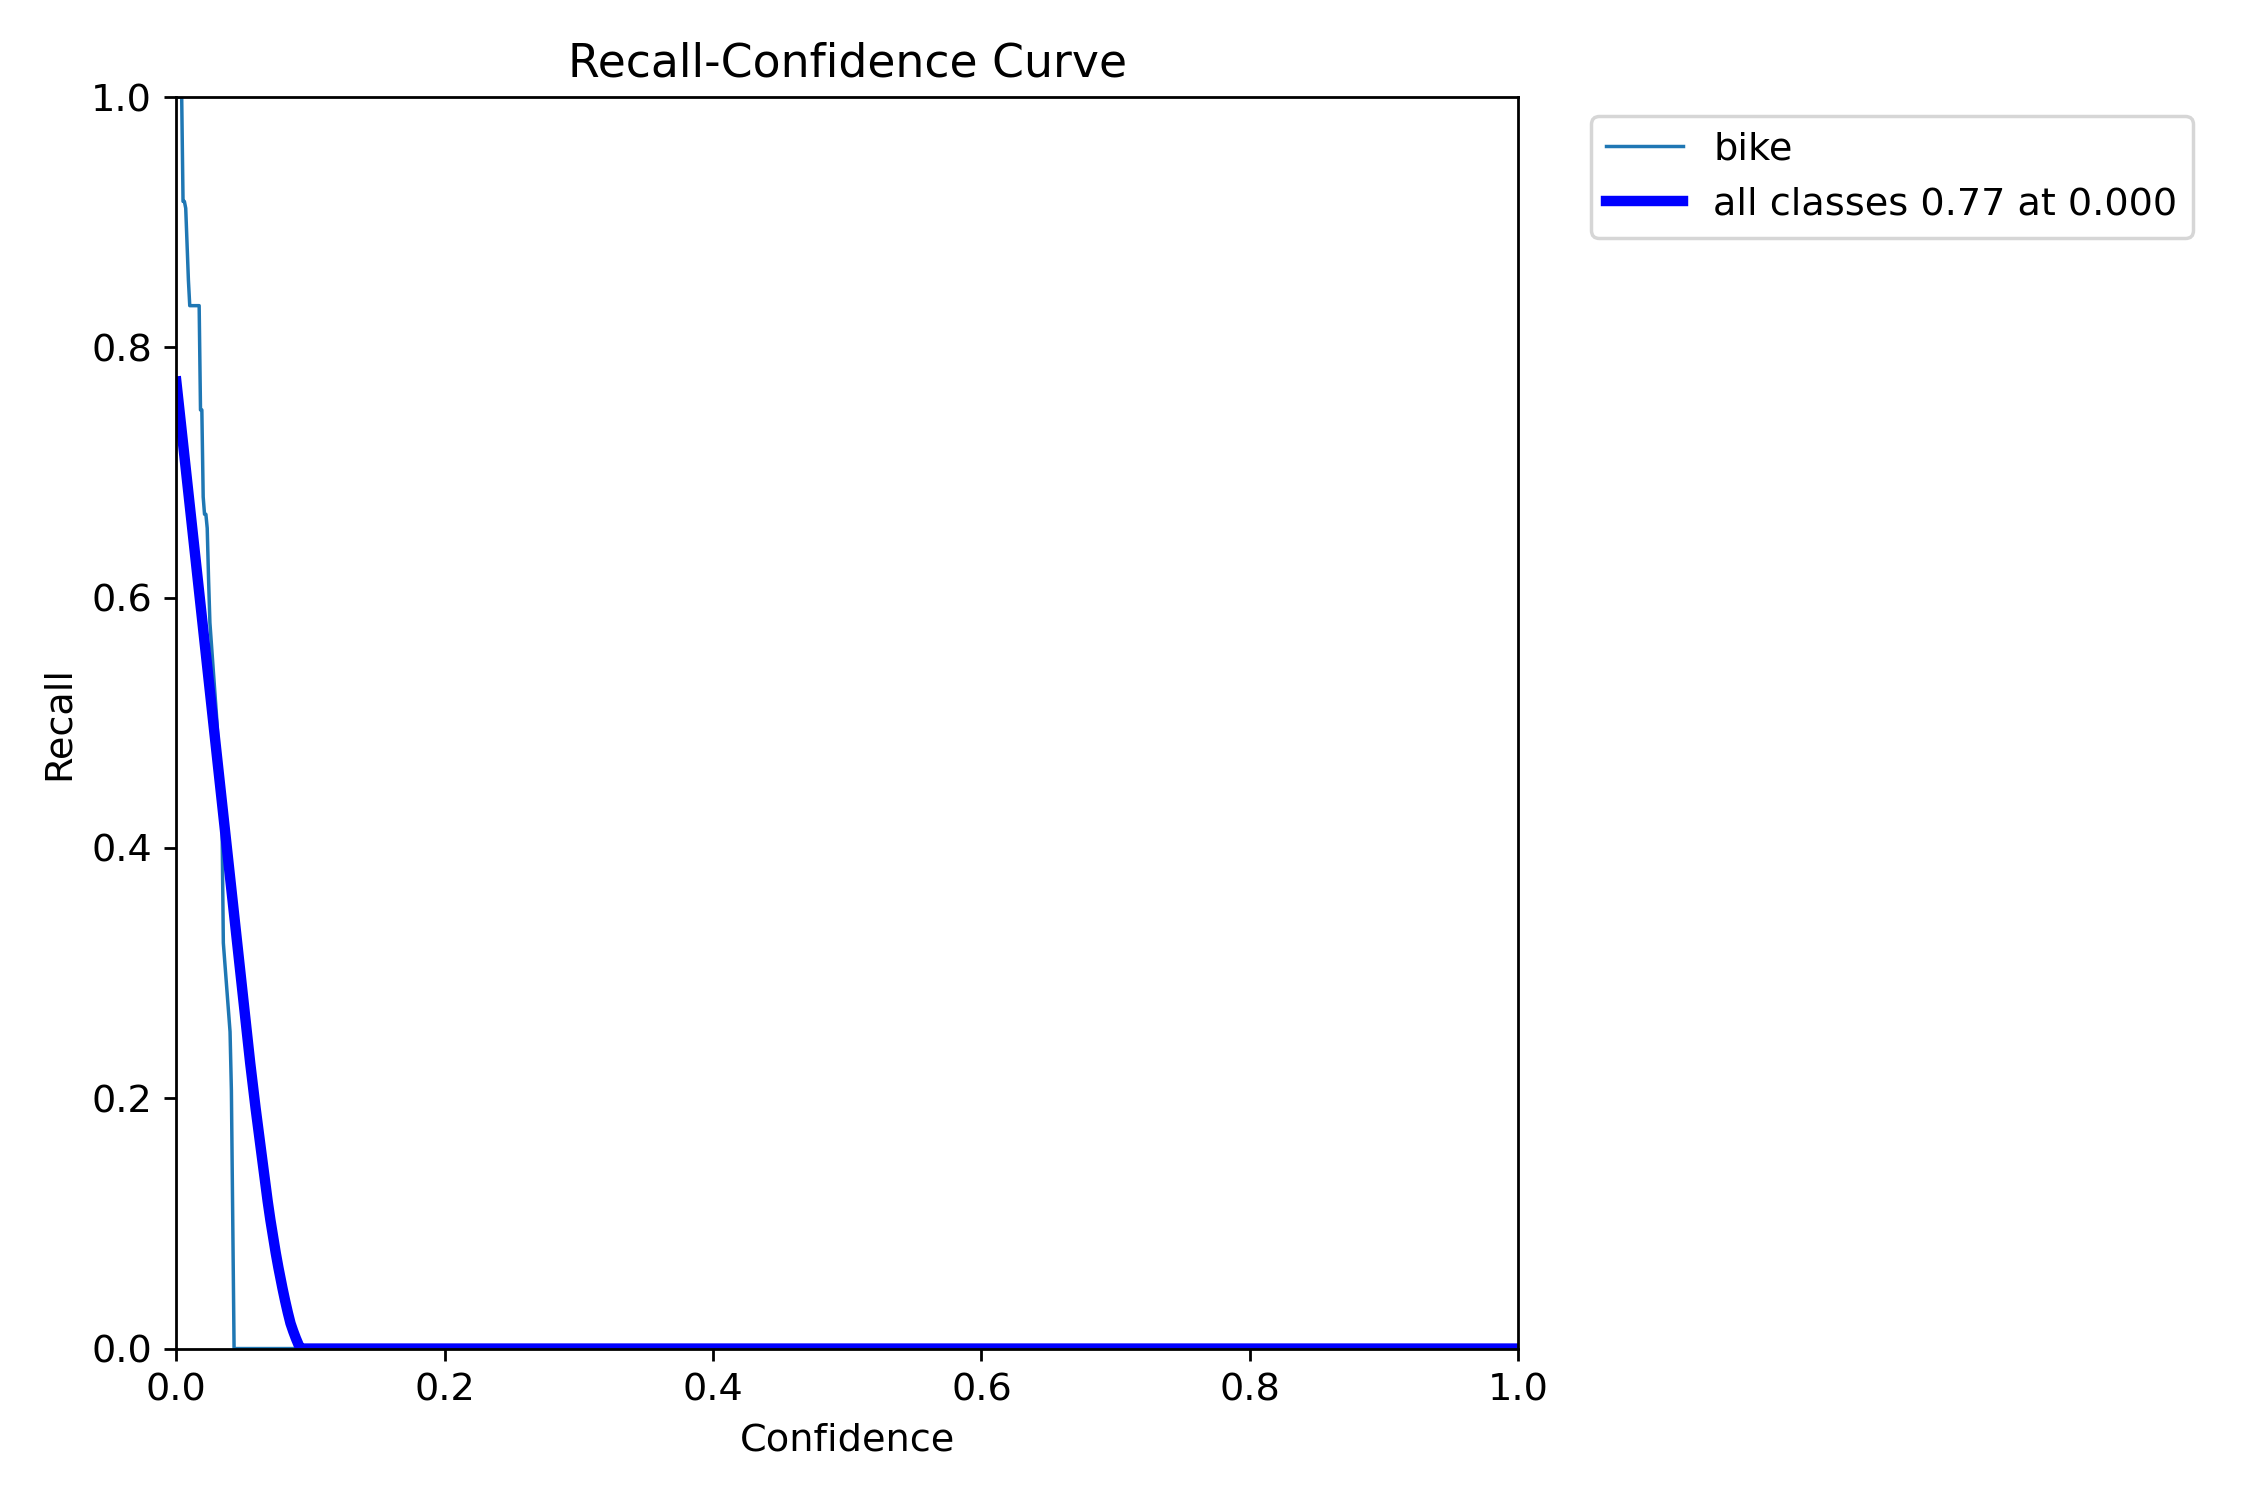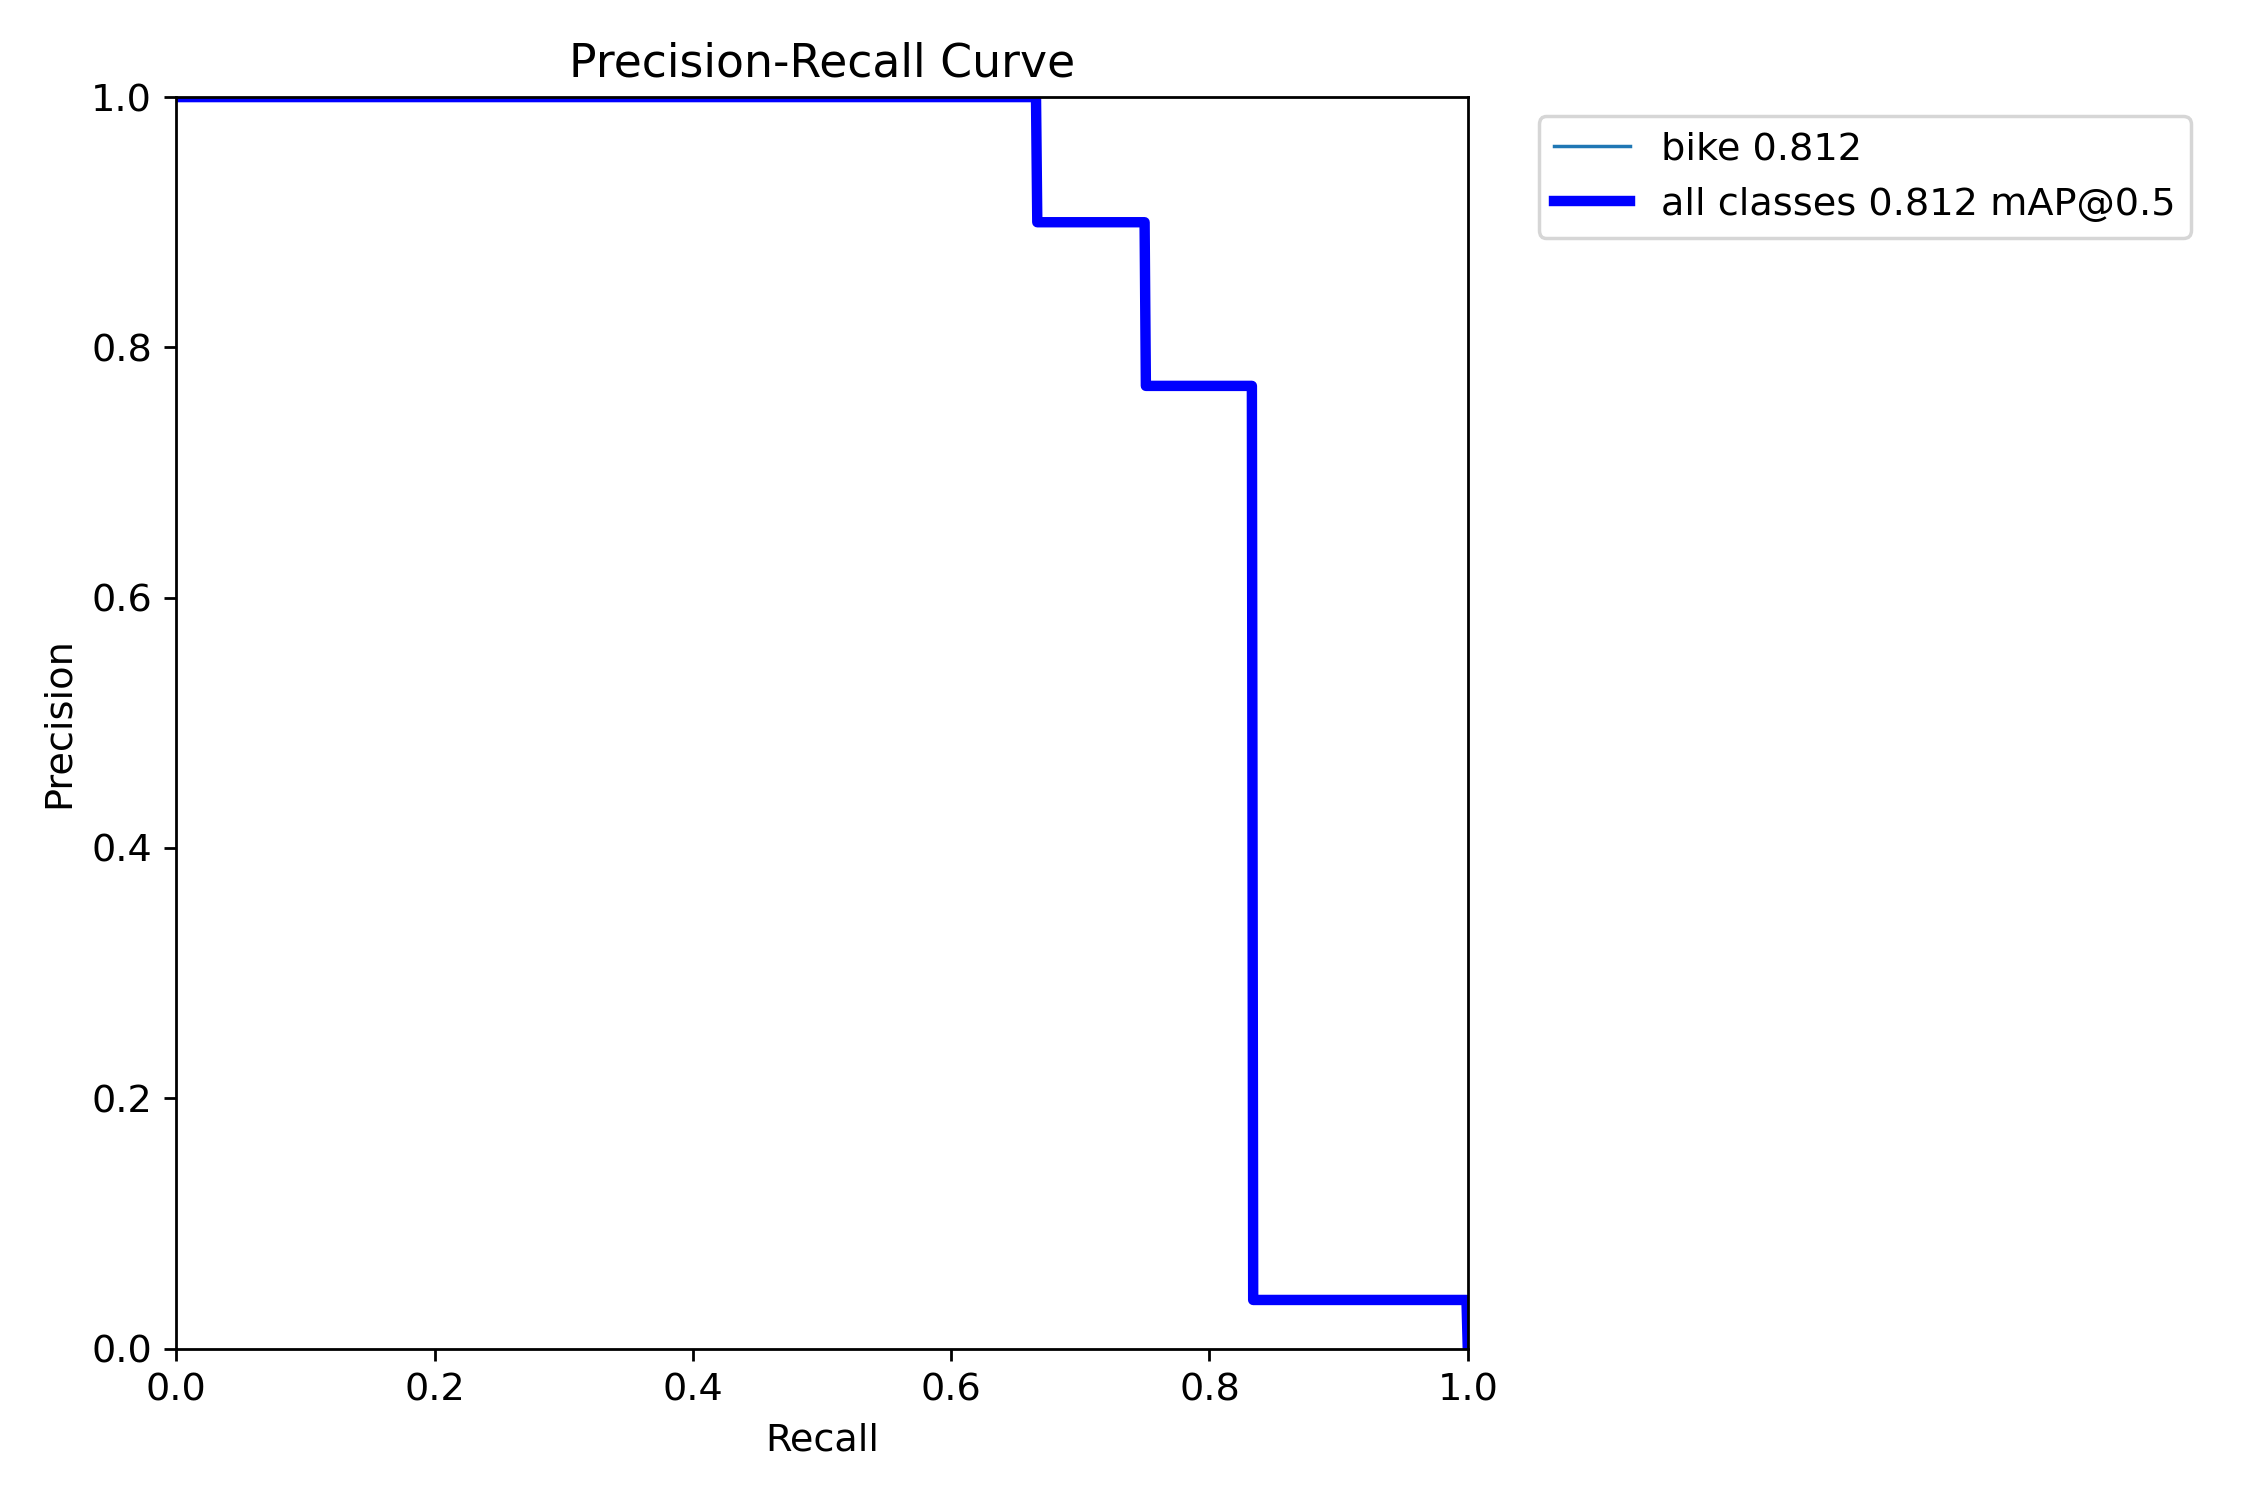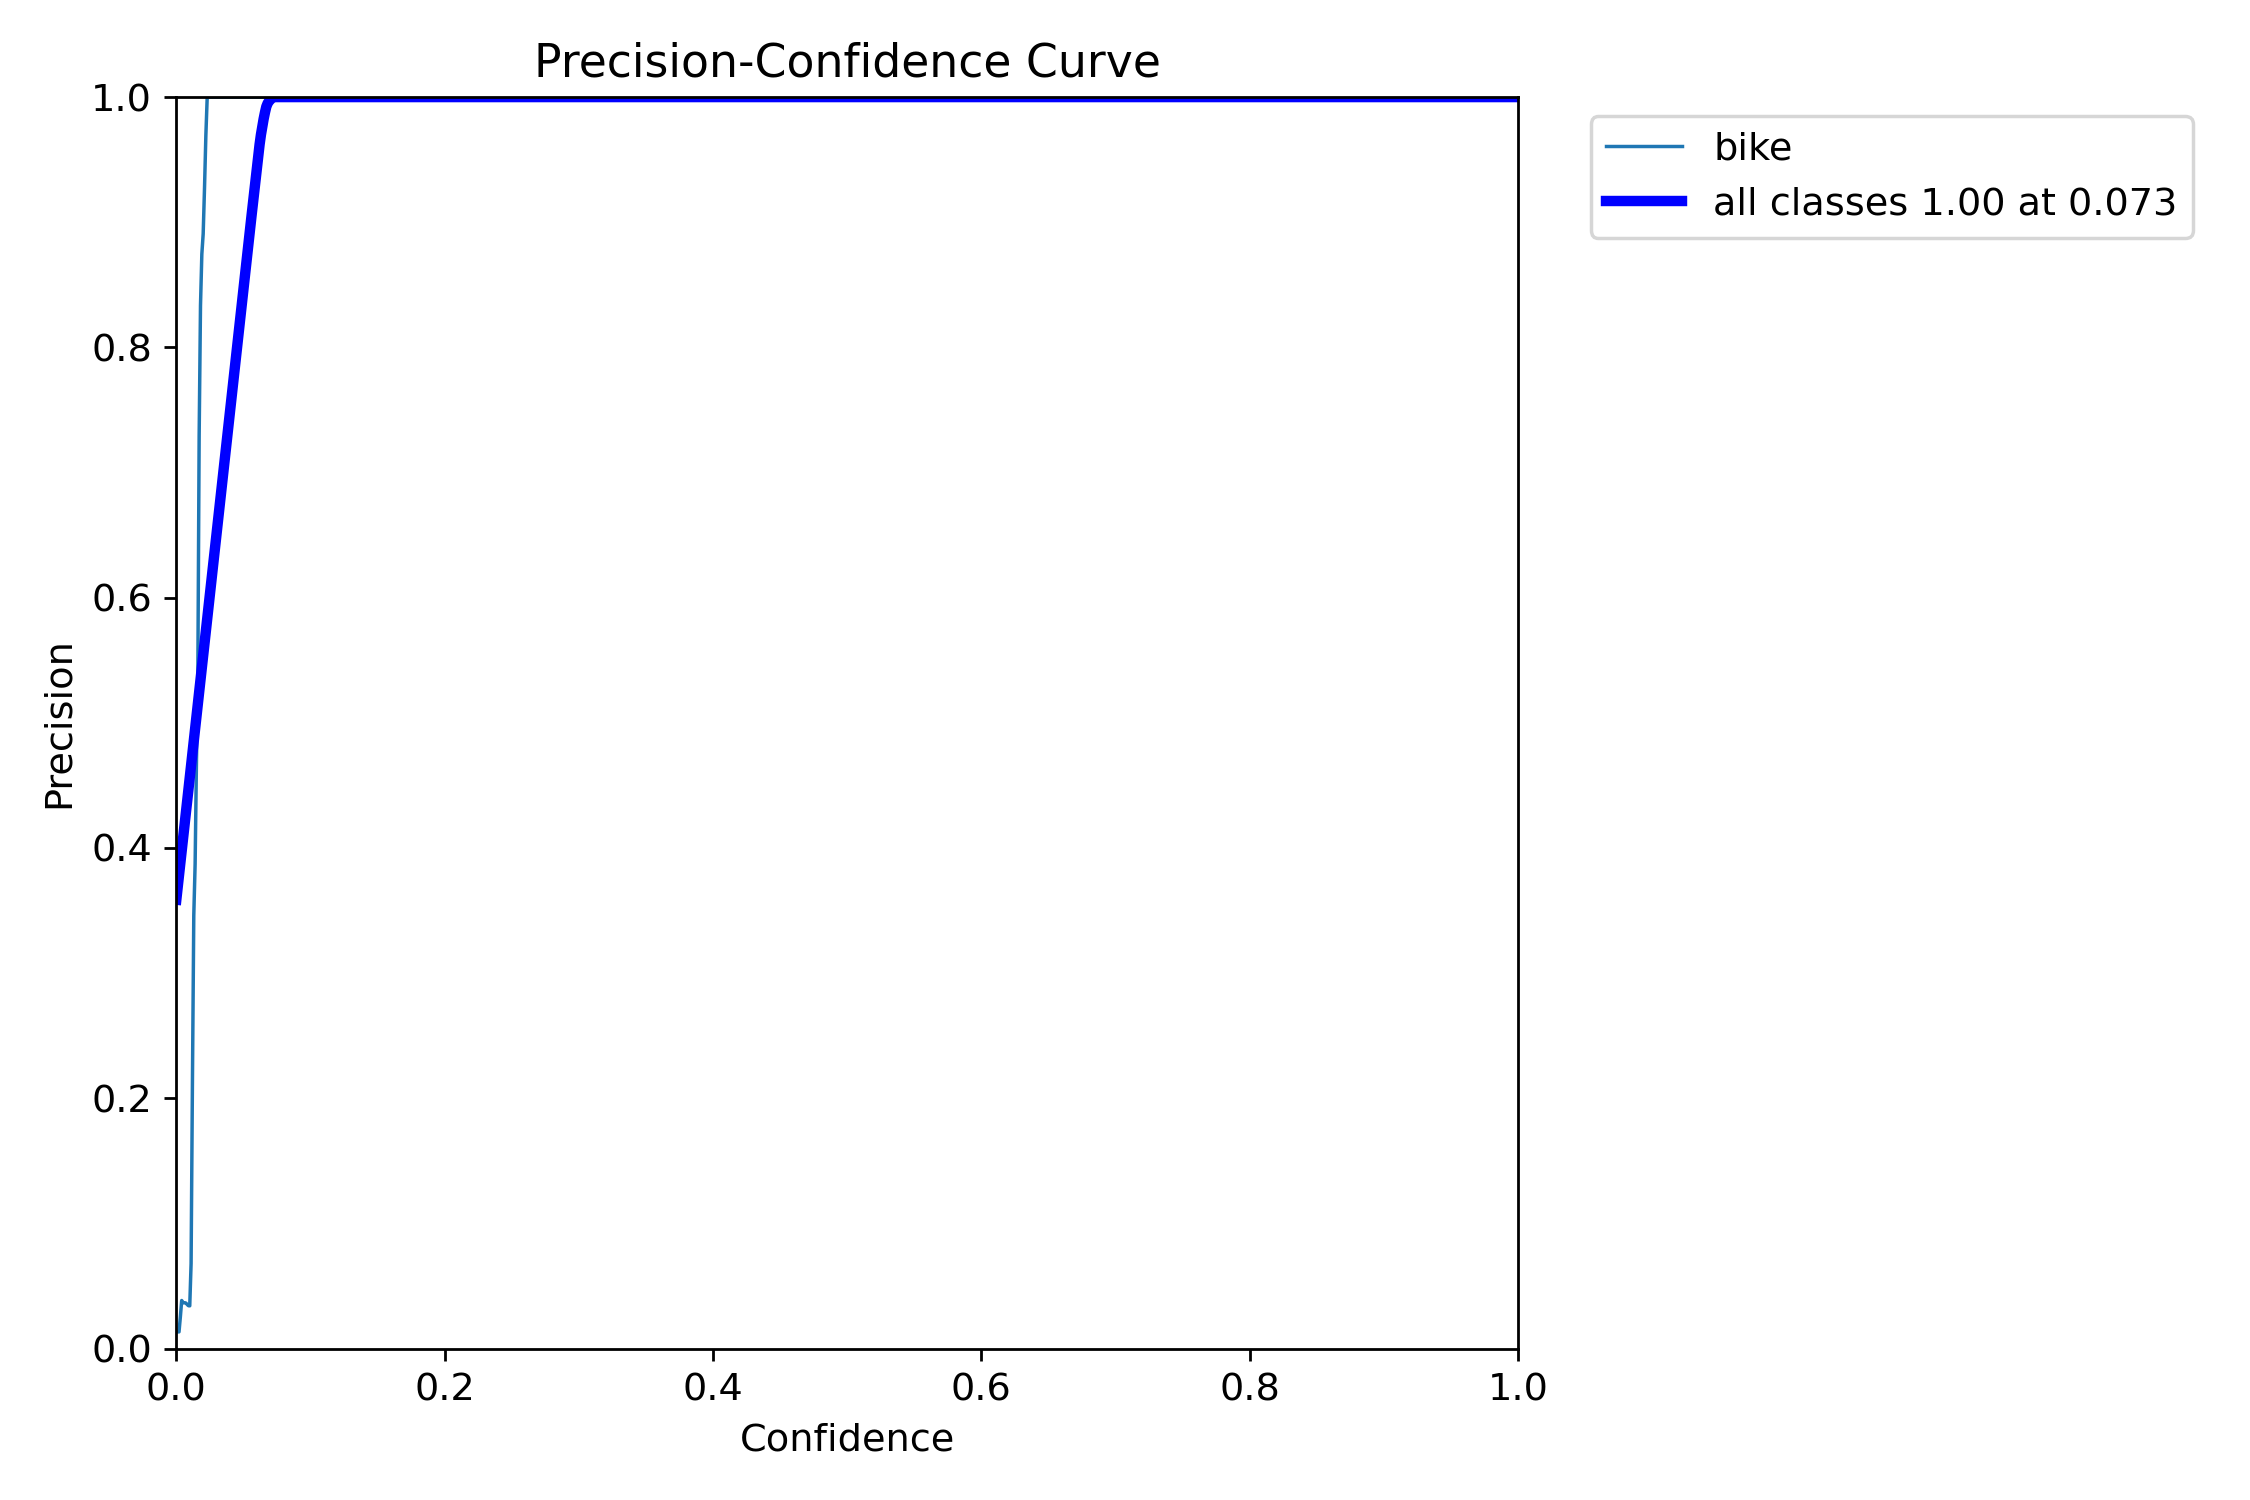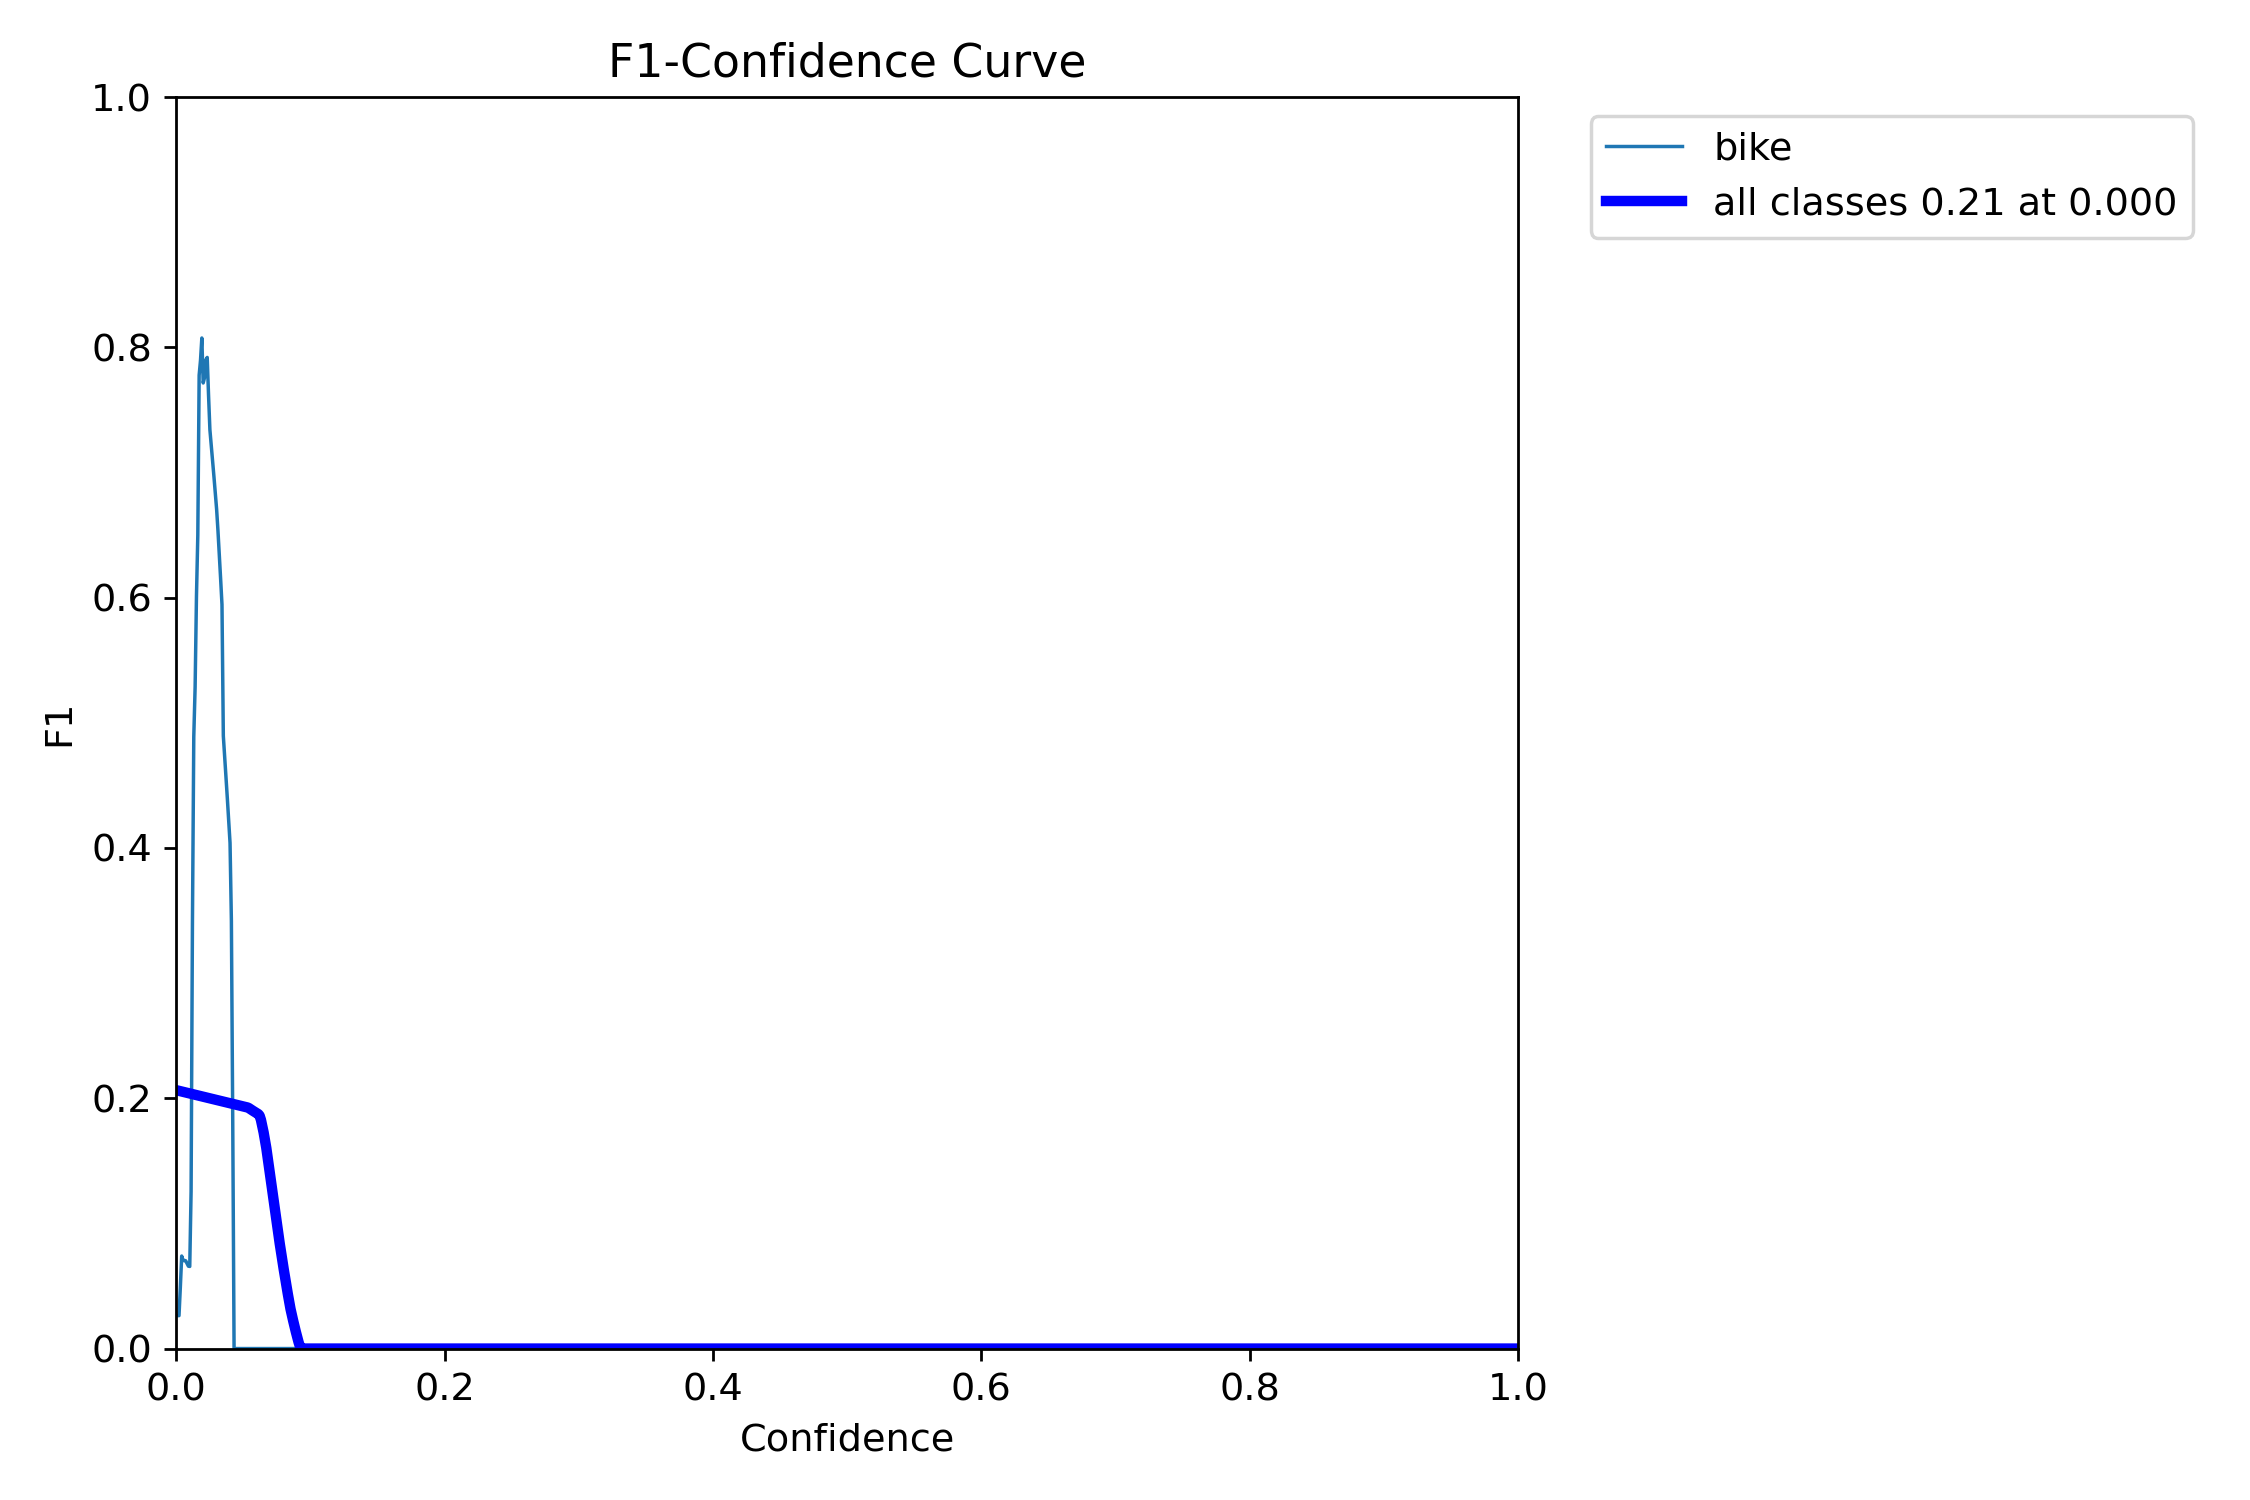


INPUT VIDEO:
 https://drive.google.com/file/d/1UO4waqv8vhvP8THv6NxpHvqKduqgqJGU/view?usp=sharing